# Toronto Major Crime Indicators (MCI)  Analysis

## Introduction 

This notebook will analyses crime in the city of Toronto. MI will be analyzed from 2004 to 2018. In notebook will discover correlation between crime and population, as well as contribution of unemployment and income to the crime rates. In addition, we will review methods of forecasting and attempt to forecast number of crimes in 2019 and 2020. 
    
Furthermore, we will look into crime seasonality, discover crime patters and correlations between different types of crimes. In addition, we will determine the most dangerous and the safest neighborhoods in the city of Toronto. 


<b>Project Plan:</b>

1. Analyze Toronto MCI 
2. Find  the most dangerous and safest neighborhoods in Toronto
3. Map Toronto MCI, and neighborhoods income.
4. Analyze MCI per capita
5. Look for correlations of MCI with Population growth, Unemployment, Average Income, and Average Neighborhood income
6. Predict number of MCI in 2019 and 2020<br>
    - Linear regression
    - Polynomial regression (2nd, 3rd orders)
	- Support Vector Machine 
	
7. Look for seasonality of the MCI
8. Build MCI prediction model. Predict type of crime based on location
 

### Data soruce 

The source of data:  http://data.torontopolice.on.ca/pages/open-data

I have merged MCI datasheet with Homicide datasheet.


I did not include columns that are not relevant to my analysis.  

# Import Required Libraries

In [1]:
#!pip install pingouin

In [1]:
import scipy

In [1]:
import sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import folium
import calendar
from datetime import datetime
import pingouin as pg

In [5]:
#Option to turn off warnings 
"""
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
"""

'\nimport sys\nimport warnings\n\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n'

# Load and clean data

In [3]:
df = pd.read_csv('G:\PROJECT\Guide\Data\mci.csv')
df.tail()

,Index_,Occurrence_Date,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
168535,179392,2018-05-16T20:30:00.000Z,2018.0,May,D54,43,Auto Theft,Victoria Village (43),43.718910,-79.304466
168536,179393,2018-05-24T18:00:00.000Z,2018.0,May,D55,62,Auto Theft,East End-Danforth (62),43.684856,-79.297562
168537,179394,2018-05-24T19:00:00.000Z,2018.0,May,D41,122,Auto Theft,Birchcliffe-Cliffside (122),43.685402,-79.274391
168538,179395,2018-05-24T17:00:00.000Z,2018.0,May,D23,1,Auto Theft,West Humber-Clairville (1),43.686760,-79.595566
168539,179396,2018-05-22T09:00:00.000Z,2018.0,May,D32,27,Auto Theft,York University Heights (27),43.775364,-79.481178


In [4]:
print('Shape:',df.shape)
print('-------------INFO---------------')
print(df.info())
print('-------------COLUMNS---------------')
print(df.columns)
print('-------------INDEX---------------')
print(df.index)

Shape: (168540, 10)
-------------INFO---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168540 entries, 0 to 168539
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Index_            168540 non-null  int64  
 1   Occurrence_Date   168540 non-null  object 
 2   Occurrence_year   168491 non-null  float64
 3   Occurrence_Month  167476 non-null  object 
 4   Division          168540 non-null  object 
 5   Hood_ID           168540 non-null  int64  
 6   Type              168540 non-null  object 
 7   Neighbourhood     168540 non-null  object 
 8   Lat               168540 non-null  float64
 9   Long              168540 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 12.9+ MB
None
-------------COLUMNS---------------
Index(['Index_', 'Occurrence_Date', 'Occurrence_year', 'Occurrence_Month',
       'Division', 'Hood_ID', 'Type', 'Neighbourhood', 'Lat', 'Long'],
      dtyp

In [5]:
print('Duplicates:',df.duplicated().any())

Duplicates: False


In [6]:
print('Missing Data')
df.isnull().sum().sort_values(ascending=False)

Missing Data


Occurrence_Month    1064
Occurrence_year       49
Index_                 0
Occurrence_Date        0
Division               0
Hood_ID                0
Type                   0
Neighbourhood          0
Lat                    0
Long                   0
dtype: int64

No duplicates, missing data are year and month, can be restored from occurence date

In [7]:
#convert to proper format
from datetime import datetime
df['Occurrence_Date'] = df['Occurrence_Date'].astype('datetime64[ns]') 
df['Occurrence_year'] = df['Occurrence_year'].astype('Int32') 
df['Occurrence_Month'] = df['Occurrence_Month'].astype(str) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168540 entries, 0 to 168539
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Index_            168540 non-null  int64         
 1   Occurrence_Date   168540 non-null  datetime64[ns]
 2   Occurrence_year   168491 non-null  Int32         
 3   Occurrence_Month  168540 non-null  object        
 4   Division          168540 non-null  object        
 5   Hood_ID           168540 non-null  int64         
 6   Type              168540 non-null  object        
 7   Neighbourhood     168540 non-null  object        
 8   Lat               168540 non-null  float64       
 9   Long              168540 non-null  float64       
dtypes: Int32(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 12.4+ MB


In [8]:
df['Occurrence_year'] = df.apply(
    lambda row: row['Occurrence_Date'].year if np.isnan(row['Occurrence_year']) else row['Occurrence_year'],
    axis=1
)

TypeError: boolean value of NA is ambiguous

In [9]:

# <4 cux nan = 3
df['Occurrence_Month'] = df.apply(
    lambda row: calendar.month_name[row['Occurrence_Date'].month]  if len(row['Occurrence_Month'])<4 else row['Occurrence_Month'],
    axis=1
)
df.head()

,Index_,Occurrence_Date,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
0,1,2004-01-03 05:00:00,2004,January,D53,98,Other,Rosedale-Moore Park (98),43.685028,-79.392853
1,2,2004-01-08 05:00:00,2004,January,D42,137,Shooting,Woburn (137),43.781536,-79.234962
2,3,2004-01-08 05:00:00,2004,January,D42,132,Shooting,Malvern (132),43.810860,-79.206894
3,4,2004-01-25 05:00:00,2004,January,D13,93,Shooting,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403
4,5,2004-01-25 05:00:00,2004,January,D42,131,Shooting,Rouge (131),43.823543,-79.203865


In [10]:
# df has its index, so drop csv index
df = df.drop(columns=['Index_'])
df.head()

,Occurrence_Date,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
0,2004-01-03 05:00:00,2004,January,D53,98,Other,Rosedale-Moore Park (98),43.685028,-79.392853
1,2004-01-08 05:00:00,2004,January,D42,137,Shooting,Woburn (137),43.781536,-79.234962
2,2004-01-08 05:00:00,2004,January,D42,132,Shooting,Malvern (132),43.810860,-79.206894
3,2004-01-25 05:00:00,2004,January,D13,93,Shooting,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403
4,2004-01-25 05:00:00,2004,January,D42,131,Shooting,Rouge (131),43.823543,-79.203865


In [44]:
print('Missing Data')
df.isnull().sum().sort_values(ascending=False)

Missing Data


Occurrence_year     49
Occurrence_Date      0
Occurrence_Month     0
Division             0
Hood_ID              0
Type                 0
Neighbourhood        0
Lat                  0
Long                 0
dtype: int64

Missing data are now recovered. Homiced data are avilable from 2004, while other major crimes only from 2014. 
I will limit analysis to years 2014 to 2018. 

In [45]:
#include years from 2014 2018 
df = df[df.Occurrence_year >=2014.0]
df = df[df.Occurrence_year <=2018.0]

# MCI analysis

### Year to year by groups

In [11]:
df_ct = pd.crosstab(df.Type, df.Occurrence_year, margins=True)
df_ct

Occurrence_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
Type,,,,,,,,,,,,,,,,,,,,
Assault,9,11,5,9,7,15,7,20,29,38,48,68,122,304,16375,17705,18475,18973,18617,90837
Auto Theft,2,1,0,0,0,0,0,0,3,0,4,1,2,32,3496,3195,3264,3558,4617,18175
Break and Enter,0,0,2,0,0,0,0,0,0,1,3,3,4,72,7178,6899,6387,6876,7485,34910
Other,0,0,0,0,19,15,19,18,14,11,20,15,16,21,15,15,25,15,25,263
Robbery,0,0,0,0,3,0,0,0,0,0,0,0,1,37,3585,3464,3613,3901,3522,18126
Shooting,0,0,0,0,26,53,29,44,37,37,32,28,34,22,27,26,41,39,51,526
Stabbing,0,0,0,0,19,12,22,24,19,14,13,8,7,14,16,18,9,11,20,226
Theft Over,3,0,0,0,2,1,1,2,1,4,5,11,12,71,994,1019,1012,1149,1141,5428
All,14,12,7,9,76,96,78,108,103,105,125,134,198,573,31686,32341,32826,34522,35478,168491


Text(0.5, 1.0, 'MCI Type by Year')

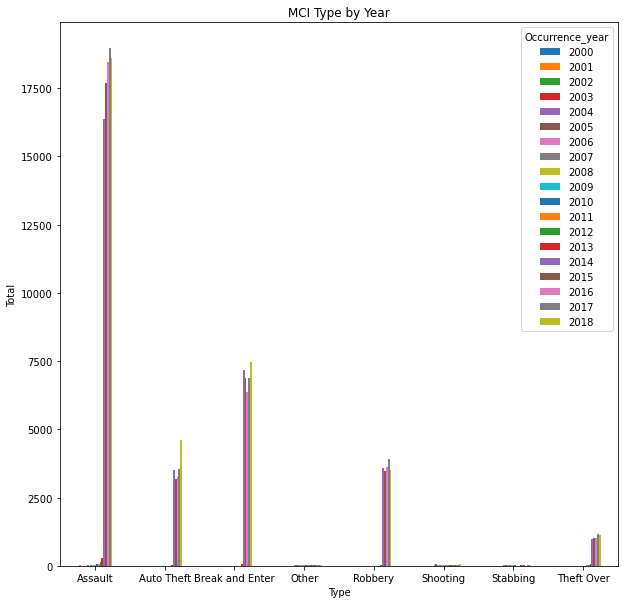

In [12]:
df_ct_plot = pd.crosstab(df.Type, df.Occurrence_year)
df_ct_plot.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 10));
plt.ylabel('Total')
plt.title('MCI Type by Year')

<b> Other - is category of homicide that is neither Shooting or Stabbing </b>

I will extract MCI index from crosstab dataframe. I will use it for analysis below. 

In [13]:
# remove row all from min/max analysis and create mci per year 
mciPerYear = df_ct.loc['All']
df_ct = df_ct.iloc[:-1,:]
mciPerYear = mciPerYear[:-1]
mciPerYear

Occurrence_year
2000       14
2001       12
2002        7
2003        9
2004       76
2005       96
2006       78
2007      108
2008      103
2009      105
2010      125
2011      134
2012      198
2013      573
2014    31686
2015    32341
2016    32826
2017    34522
2018    35478
Name: All, dtype: int64

In [14]:
print('Leading Crime')
print('-----------------')
for i in range(0,df_ct.shape[1]-1): 
    row = df_ct.iloc[:,i][df_ct.iloc[:,i] == df_ct.iloc[:,i].max()]
    print(row)
    print('-----------------')

Leading Crime
-----------------
Type
Assault    9
Name: 2000, dtype: int64
-----------------
Type
Assault    11
Name: 2001, dtype: int64
-----------------
Type
Assault    5
Name: 2002, dtype: int64
-----------------
Type
Assault    9
Name: 2003, dtype: int64
-----------------
Type
Shooting    26
Name: 2004, dtype: int64
-----------------
Type
Shooting    53
Name: 2005, dtype: int64
-----------------
Type
Shooting    29
Name: 2006, dtype: int64
-----------------
Type
Shooting    44
Name: 2007, dtype: int64
-----------------
Type
Shooting    37
Name: 2008, dtype: int64
-----------------
Type
Assault    38
Name: 2009, dtype: int64
-----------------
Type
Assault    48
Name: 2010, dtype: int64
-----------------
Type
Assault    68
Name: 2011, dtype: int64
-----------------
Type
Assault    122
Name: 2012, dtype: int64
-----------------
Type
Assault    304
Name: 2013, dtype: int64
-----------------
Type
Assault    16375
Name: 2014, dtype: int64
-----------------
Type
Assault    17705
Name: 201

In [15]:
print('Least occuring Crime')
print('-----------------')
for i in range(0,df_ct.shape[1]-1): 
    row = df_ct.iloc[:,i][df_ct.iloc[:,i] == df_ct.iloc[:,i].min()]
    print(row)
    print('-----------------')

Least occuring Crime
-----------------
Type
Break and Enter    0
Other              0
Robbery            0
Shooting           0
Stabbing           0
Name: 2000, dtype: int64
-----------------
Type
Break and Enter    0
Other              0
Robbery            0
Shooting           0
Stabbing           0
Theft Over         0
Name: 2001, dtype: int64
-----------------
Type
Auto Theft    0
Other         0
Robbery       0
Shooting      0
Stabbing      0
Theft Over    0
Name: 2002, dtype: int64
-----------------
Type
Auto Theft         0
Break and Enter    0
Other              0
Robbery            0
Shooting           0
Stabbing           0
Theft Over         0
Name: 2003, dtype: int64
-----------------
Type
Auto Theft         0
Break and Enter    0
Name: 2004, dtype: int64
-----------------
Type
Auto Theft         0
Break and Enter    0
Robbery            0
Name: 2005, dtype: int64
-----------------
Type
Auto Theft         0
Break and Enter    0
Robbery            0
Name: 2006, dtype: int64
-

Assault in Toronto is number the most frequently occurred type of crime, and the least occurring crime is other type of homicide. (Note homicide is categorized: shooting, stabbing, other) 

In [50]:
description = df_ct[0:-1].describe()
description


Occurrence_year,2014,2015,2016,2017,2018,All
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4384.571429,4474.571429,4544.857143,4767.571429,4905.285714,23076.857143
std,5918.452694,6365.522311,6598.474077,6782.636849,6682.189230,32318.531276
min,15.000000,15.000000,9.000000,11.000000,20.000000,74.000000
25%,21.500000,22.000000,33.000000,27.000000,38.000000,139.500000
50%,3496.000000,3195.000000,3264.000000,3558.000000,3522.000000,18085.000000
75%,5381.500000,5181.500000,5000.000000,5388.500000,6051.000000,26477.500000
max,16375.000000,17705.000000,18475.000000,18973.000000,18617.000000,90145.000000


In [51]:
df_ct[0:-1].kurtosis()

Occurrence_year
2014    2.899502
2015    3.655690
2016    4.181385
2017    3.919598
2018    3.280965
All     3.620219
dtype: float64

Occurrence_year
2000.0         9
2001.0        11
2002.0         5
2003.0         9
2004.0         7
2005.0        15
2006.0         7
2007.0        20
2008.0        29
2009.0        38
2010.0        48
2011.0        68
2012.0       122
2013.0       304
2014.0     16375
2015.0     17705
2016.0     18475
2017.0     18973
2018.0     18617
missing       41
Name: Assault, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


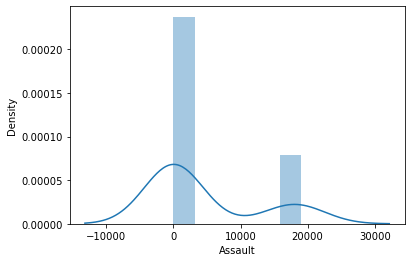

Occurrence_year
2000.0        2
2001.0        1
2002.0        0
2003.0        0
2004.0        0
2005.0        0
2006.0        0
2007.0        0
2008.0        3
2009.0        0
2010.0        4
2011.0        1
2012.0        2
2013.0       32
2014.0     3496
2015.0     3195
2016.0     3264
2017.0     3558
2018.0     4617
missing       3
Name: Auto Theft, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


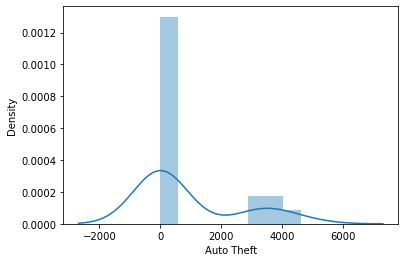

Occurrence_year
2000.0        0
2001.0        0
2002.0        2
2003.0        0
2004.0        0
2005.0        0
2006.0        0
2007.0        0
2008.0        0
2009.0        1
2010.0        3
2011.0        3
2012.0        4
2013.0       72
2014.0     7178
2015.0     6899
2016.0     6387
2017.0     6876
2018.0     7485
missing       1
Name: Break and Enter, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


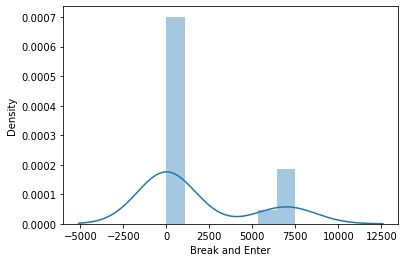

Occurrence_year
2000.0      0
2001.0      0
2002.0      0
2003.0      0
2004.0     19
2005.0     15
2006.0     19
2007.0     18
2008.0     14
2009.0     11
2010.0     20
2011.0     15
2012.0     16
2013.0     21
2014.0     15
2015.0     15
2016.0     25
2017.0     15
2018.0     25
missing     0
Name: Other, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


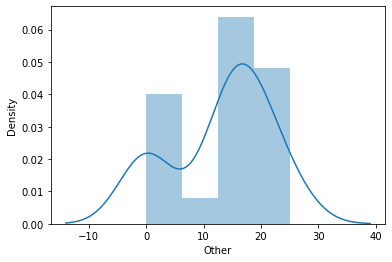

Occurrence_year
2000.0        0
2001.0        0
2002.0        0
2003.0        0
2004.0        3
2005.0        0
2006.0        0
2007.0        0
2008.0        0
2009.0        0
2010.0        0
2011.0        0
2012.0        1
2013.0       37
2014.0     3585
2015.0     3464
2016.0     3613
2017.0     3901
2018.0     3522
missing       2
Name: Robbery, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


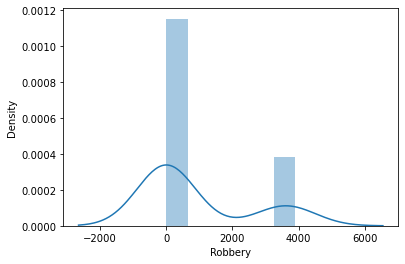

Occurrence_year
2000.0      0
2001.0      0
2002.0      0
2003.0      0
2004.0     26
2005.0     53
2006.0     29
2007.0     44
2008.0     37
2009.0     37
2010.0     32
2011.0     28
2012.0     34
2013.0     22
2014.0     27
2015.0     26
2016.0     41
2017.0     39
2018.0     51
missing     0
Name: Shooting, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


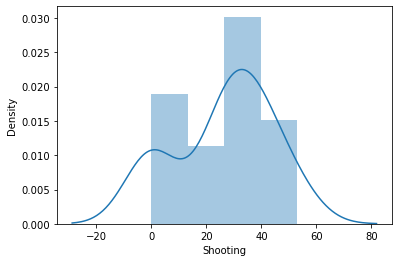

Occurrence_year
2000.0      0
2001.0      0
2002.0      0
2003.0      0
2004.0     19
2005.0     12
2006.0     22
2007.0     24
2008.0     19
2009.0     14
2010.0     13
2011.0      8
2012.0      7
2013.0     14
2014.0     16
2015.0     18
2016.0      9
2017.0     11
2018.0     20
missing     0
Name: Stabbing, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


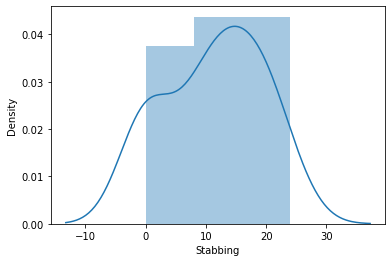

Occurrence_year
2000.0        3
2001.0        0
2002.0        0
2003.0        0
2004.0        2
2005.0        1
2006.0        1
2007.0        2
2008.0        1
2009.0        4
2010.0        5
2011.0       11
2012.0       12
2013.0       71
2014.0      994
2015.0     1019
2016.0     1012
2017.0     1149
2018.0     1141
missing       2
Name: Theft Over, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


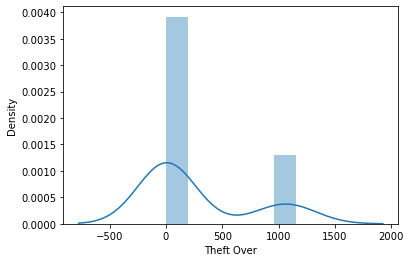

Occurrence_year
2000.0        14
2001.0        12
2002.0         7
2003.0         9
2004.0        76
2005.0        96
2006.0        78
2007.0       108
2008.0       103
2009.0       105
2010.0       125
2011.0       134
2012.0       198
2013.0       573
2014.0     31686
2015.0     32341
2016.0     32826
2017.0     34522
2018.0     35478
missing       49
Name: All, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


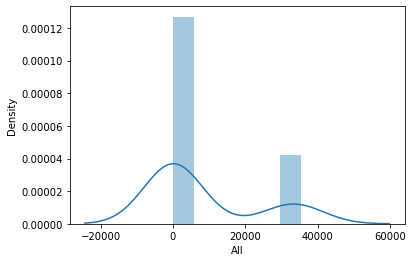

In [22]:
for i in range(0, df_ct.shape[0]):
    print (df_ct.iloc[i, 0:-1])
    sns.distplot(df_ct.iloc[i, 0:-1])
    #df_ct.iloc[i, 0:-1].hist(bins=5)
    plt.show()

From the table and distribution plots above we can see that there it is not a standard distribution. 

We will research statistics of the data by type of crime now. Lets transpose our crosstab and look at the correlation per type of crime. 

In [52]:
#Transpoded crosstab & find correlation
df_ct_t =  pd.crosstab(df.Type, df.Occurrence_year, margins=False).reindex()
df_ct_t = df_ct_t.T
type_corr = df_ct_t.corr()
type_corr

Type,Assault,Auto Theft,Break and Enter,Other,Robbery,Shooting,Stabbing,Theft Over
Type,,,,,,,,
Assault,1.000000,0.299513,-0.218075,0.456443,0.447955,0.740583,-0.318584,0.745530
Auto Theft,0.299513,1.000000,0.782182,0.499696,-0.107950,0.763292,0.558208,0.679521
Break and Enter,-0.218075,0.782182,1.000000,-0.065068,-0.251301,0.199101,0.849350,0.411949
Other,0.456443,0.499696,-0.065068,1.000000,-0.267513,0.803685,-0.058790,0.163311
Robbery,0.447955,-0.107950,-0.251301,-0.267513,1.000000,0.173498,-0.660216,0.513035
Shooting,0.740583,0.763292,0.199101,0.803685,0.173498,1.000000,-0.026706,0.708246
Stabbing,-0.318584,0.558208,0.849350,-0.058790,-0.660216,-0.026706,1.000000,0.107389
Theft Over,0.745530,0.679521,0.411949,0.163311,0.513035,0.708246,0.107389,1.000000


(8.5, -0.5)

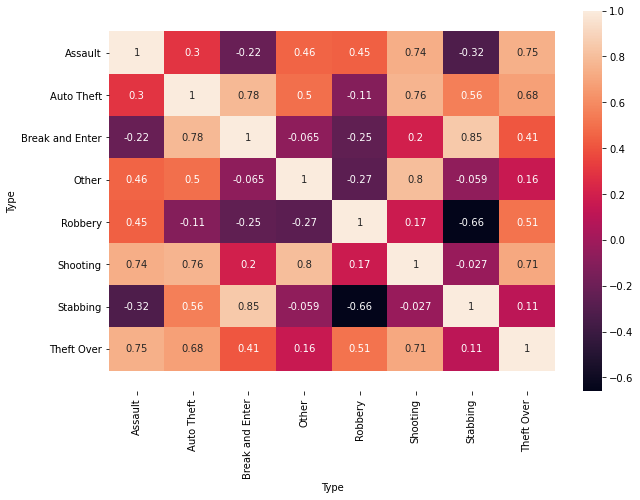

In [53]:
#Correlation heatmap
plt.figure(figsize=(10,7))
ax = sns.heatmap(type_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
 

Break and enter has high correlation with 
-	Assault

Shooting several high correlations with
-	Assault
-	Auto Theft
-	Other (Homicide) 

Stabbing has high correlation with 
-	Break and Enter

Theft Over has high correlation with
-	Assault
-	Auto Theft 
-	Shooting 


### Annual MCI analysis

In [54]:
df_annual = pd.concat([pd.Series(mciPerYear.index, name='Year'), 
                       pd.Series(mciPerYear.values, name='Type')], axis=1).reset_index()
df_annual = df_annual.drop(columns=['index'])
df_annual.sample

<bound method NDFrame.sample of    Year   Type
0  2014  31686
1  2015  32341
2  2016  32826
3  2017  34522
4  2018  35478>

Text(0.5, 1.0, 'Annual MCI')

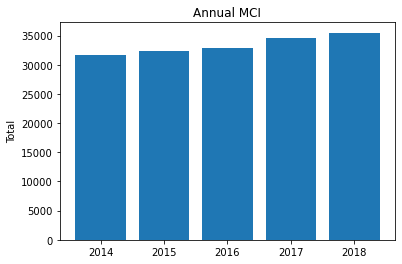

In [55]:
plt.bar('Year', height='Type', width=0.8, align='center', data=df_annual)
plt.ylabel('Total')
plt.title('Annual MCI')

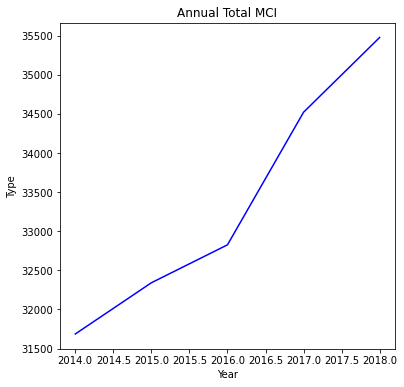

In [56]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x='Year', y='Type', data=df_annual, color='b')
ax.set_title('Annual Total MCI')
plt.show()

The total number of crimes is going up in Toronto, however, let's not jump to conclusions just yet and look at number of crimes per capita. 

## Year to year MCI by Neighbourhood

Top 5, most dangerous neighbourhoods

In [75]:
df_hood_ct = pd.crosstab(df.Neighbourhood, df.Occurrence_year, margins=True)
df_hood_ct.sort_values("All", axis = 0, ascending = False,
                 inplace = True) 
df_hood_ct.head(6)

Occurrence_year,2014,2015,2016,2017,2018,All
Neighbourhood,,,,,,
All,31686,32341,32826,34522,35478,166853
Church-Yonge Corridor (75),1020,1112,1147,1460,1555,6294
Waterfront Communities-The Island (77),943,1053,1131,1247,1267,5641
West Humber-Clairville (1),832,773,817,865,1035,4322
Moss Park (73),622,638,729,696,918,3603
Bay Street Corridor (76),581,689,671,810,806,3557


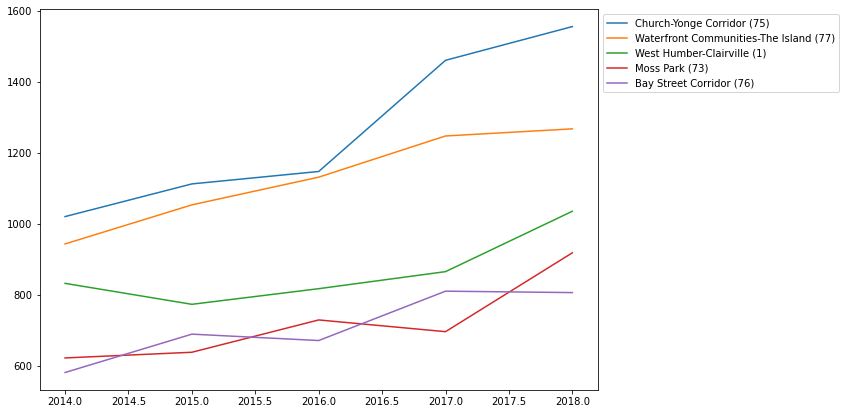

In [76]:
top5dangerous = df_hood_ct.iloc[1:6,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5dangerous)
ax.legend(top5dangerous.columns.to_list(), loc="best", bbox_to_anchor = (1,1))

Top 5, safest neighbourhoods

In [77]:
df_hood_ct.tail(5)

Occurrence_year,2014,2015,2016,2017,2018,All
Neighbourhood,,,,,,
Broadview North (57),62,64,71,53,50,300
Markland Wood (12),78,47,59,52,56,292
Yonge-St.Clair (97),57,46,51,39,41,234
Lambton Baby Point (114),34,49,30,33,44,190
Eringate-Centennial_West Deane (11),5,3,6,3,6,23


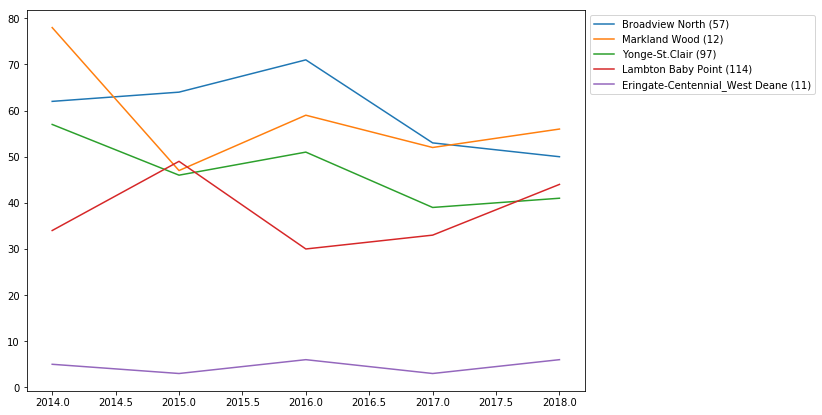

In [30]:
top5safest = df_hood_ct.iloc[-5:,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5safest)
ax.legend(top5safest.columns.to_list(), loc="best", bbox_to_anchor = (1,1))

The top 5 most dangerous neighborhoods  analysis shows that the total number of crimes is going up over the years. 
However, there is no apparent growth or reduction in total number of crimes for the safest neighborhoods  

### Most volatile neighbourhoods

To determine the most volatile neighborhoods I have looked at variance and MAD measure. However, it is not a standard distribution and I was not getting any good results. 


So I decided to look at the min and max number of crimes in the neighborhoods, then find change between min and max , and calculate percent relative to total number of crimes in the area. 

In [78]:
df_hood_ct_var = df_hood_ct;
df_hood_ct_var['min'] = df_hood_ct_var.iloc[:,:-1].min(axis=1)
df_hood_ct_var['max'] = df_hood_ct_var.iloc[:,:-2].max(axis=1)
df_hood_ct_var['Delta'] = 100*(df_hood_ct_var['max'] - df_hood_ct_var['min'])/df_hood_ct_var['All']
df_hood_ct_var.sort_values("Delta", axis = 0, ascending = False,
                 inplace = True) 
df_hood_ct_var.head(5)

Occurrence_year,2014,2015,2016,2017,2018,All,min,max,Delta
Neighbourhood,,,,,,,,,
Forest Hill South (101),68,55,47,106,82,358,47,106,16.480447
Mount Pleasant East (99),81,70,53,101,108,413,53,108,13.317191
Eringate-Centennial_West Deane (11),5,3,6,3,6,23,3,6,13.043478
Woodbine-Lumsden (60),118,80,82,65,83,428,65,118,12.383178
Mimico (includes Humber Bay Shores) (17),316,335,351,481,548,2031,316,548,11.422944


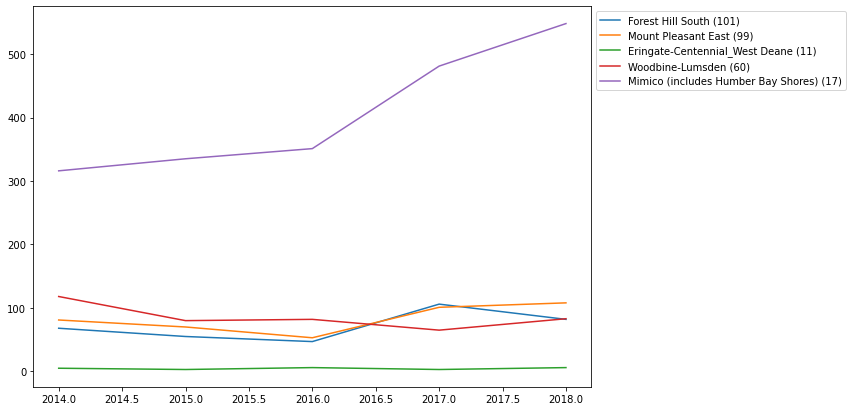

In [79]:
top5volatile = df_hood_ct_var.iloc[0:5,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5volatile)
ax.legend(top5volatile.columns.to_list(), loc="best", bbox_to_anchor = (1,1))

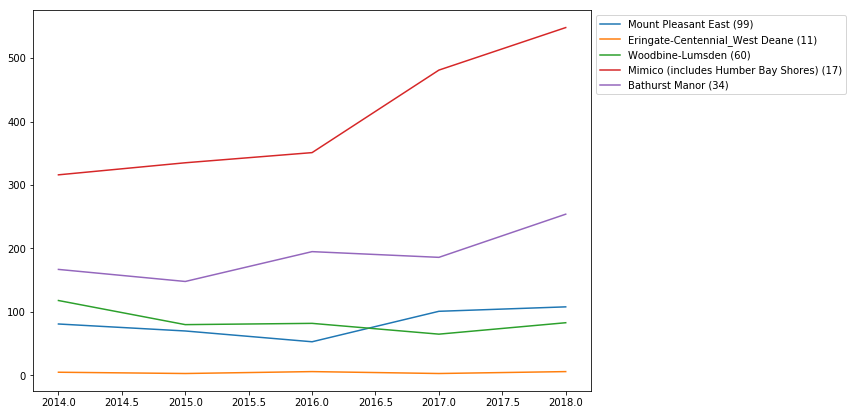

In [33]:
#lets take one step down the list
top5volatile = df_hood_ct_var.iloc[1:6,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5volatile)
ax.legend(top5volatile.columns.to_list(), loc="best", bbox_to_anchor = (1,1))

In [34]:
#lets take one more step down the list

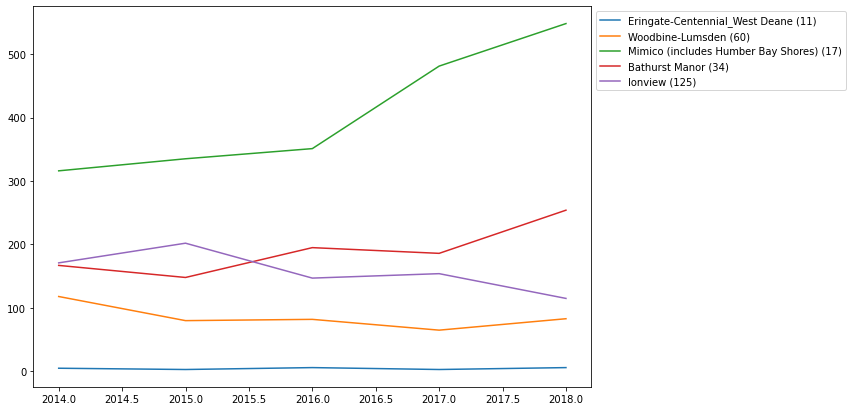

In [80]:
top5volatile = df_hood_ct_var.iloc[2:7,:5].T
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(top5volatile)
ax.legend(top5volatile.columns.to_list(), loc="best", bbox_to_anchor = (1,1))

I found that one plot is not sufficient to display trends in volatility due to scale. I stepped through the ordered list and plotted a few graphs. From graphs I found that neighborhoods below have an upward trend.
- Forest Hill South (101
- Mount Pleasant East (99)
- Mimico (includes Humber Bay Shores) (17)
- Mount Pleasant East (99) 

# Mapping MCI

### Import Geopandas library

Detailed tutorial for creating Toronto map can be found here 

https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55

In [36]:
import geopandas as gpd
sns.set(style="darkgrid")

In [37]:
#group data by Neighbourhood and count 
df_gp = df.groupby(['Hood_ID','Neighbourhood']).count()[['Type']]
df_gp= df_gp.reset_index()
df_gp

,Hood_ID,Neighbourhood,Type
0,1,West Humber-Clairville (1),4322
1,2,Mount Olive-Silverstone-Jamestown (2),2250
2,3,Thistletown-Beaumond Heights (3),612
3,4,Rexdale-Kipling (4),694
4,5,Elms-Old Rexdale (5),581
...,...,...,...
136,136,West Hill (136),2842
137,137,Woburn (137),3149
138,138,Eglinton East (138),1797
139,139,Scarborough Village (139),1237


Download "Shapefile" and unzip folder , then copy to the project folder

https://open.toronto.ca/dataset/neighbourhoods/

In [38]:
location = '../input/Neighbourhoods/Neighbourhoods.shp'
hoods = gpd.read_file(location)
hoods.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
99,2760,25886648,25926761,49885,33,33,Clanton Park (33),Clanton Park (33),None,None,-79.446303,43.741978,16493089,7.942402e+06,14050.036863,"POLYGON ((-79.43371 43.73615, -79.43626 43.734..."
68,2729,25886590,25926730,49885,51,51,Willowdale East (51),Willowdale East (51),None,None,-79.401484,43.770602,16492593,9.712453e+06,13142.255078,"POLYGON ((-79.41225 43.76669, -79.41232 43.766..."
20,2681,25886715,25926682,49885,2,2,Mount Olive-Silverstone-Jamestown (2),Mount Olive-Silverstone-Jamestown (2),None,None,-79.587259,43.746868,16491825,8.893568e+06,17941.019557,"POLYGON ((-79.60338 43.75786, -79.60205 43.758..."
36,2697,25886360,25926698,49885,67,67,Playter Estates-Danforth (67),Playter Estates-Danforth (67),None,None,-79.354887,43.679700,16492081,1.698163e+06,6222.909745,"POLYGON ((-79.36339 43.67532, -79.36347 43.675..."
119,2780,25886640,25926781,49885,25,25,Glenfield-Jane Heights (25),Glenfield-Jane Heights (25),None,None,-79.513465,43.745636,16493409,9.875139e+06,15837.879120,"POLYGON ((-79.52628 43.73640, -79.52721 43.740..."


In [39]:
merged = hoods.set_index('FIELD_7').join(df_gp.set_index('Neighbourhood'))
merged = merged.reset_index()
merged[['FIELD_7', 'FIELD_11', 'FIELD_12', 'geometry', 'Type']].sample(5)
merged.head(5)

,FIELD_7,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,Hood_ID,Type
0,Wychwood (94),2661,25886861,25926662,49885,94,94,Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",94,622
1,Yonge-Eglinton (100),2662,25886820,25926663,49885,100,100,Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",100,323
2,Yonge-St.Clair (97),2663,25886834,25926664,49885,97,97,Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",97,234
3,York University Heights (27),2664,25886593,25926665,49885,27,27,York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",27,3122
4,Yorkdale-Glen Park (31),2665,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",31,1565


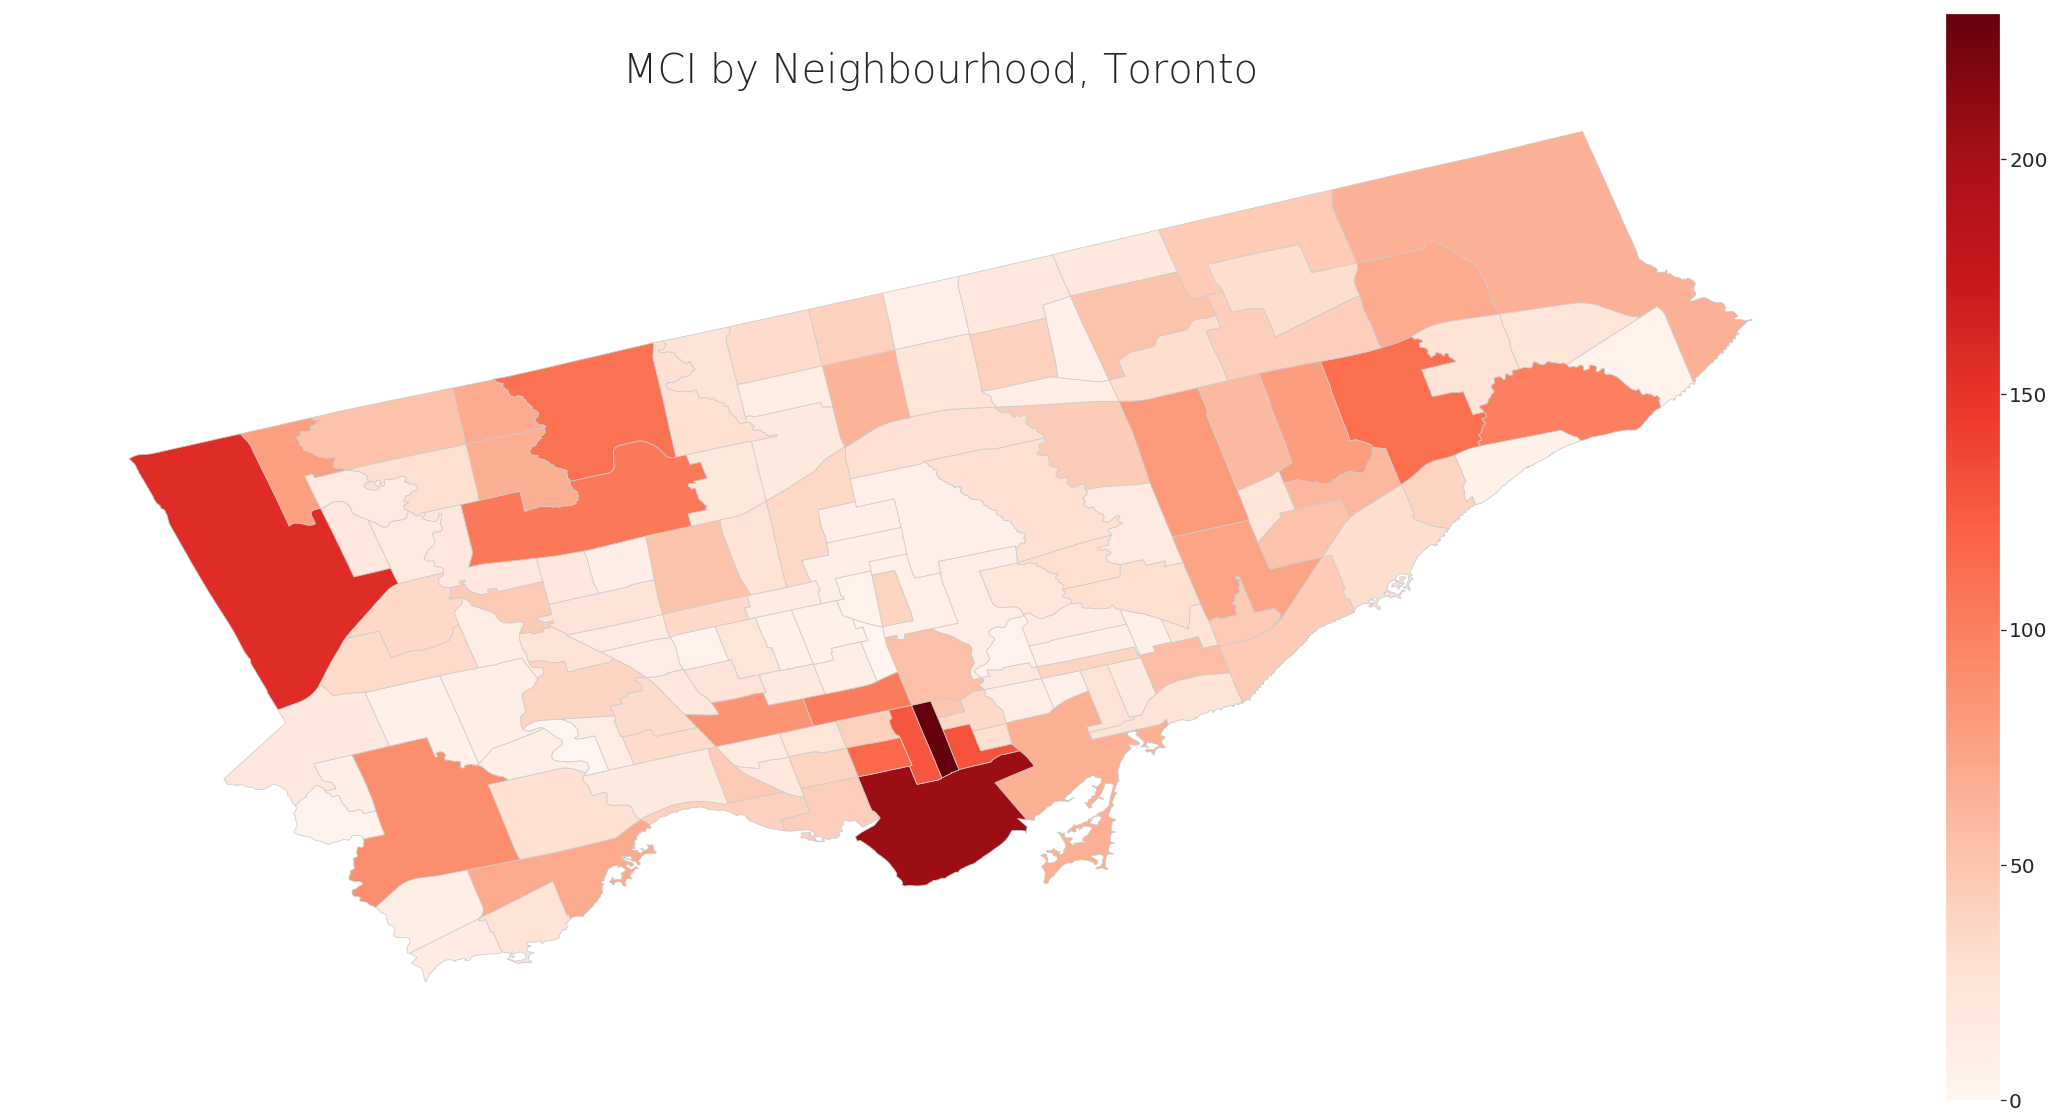

In [40]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('MCI by Neighbourhood, Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Reds'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('Type', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

# Neighborhoods by Income

In [41]:
df_hood_income = pd.read_csv('../input/hood_income.csv')
#convert to lower case for for mergin
df_hood_income['Neighborhood']=df_hood_income['Neighborhood'].str.lower()
df_hood_income.head()

,Neighborhood,HoodAveIncome,HoodID
0,city of toronto,52268,0
1,agincourt north,30414,129
2,agincourt south-malvern west,31825,128
3,alderwood,47709,20
4,annex,112766,95


In [42]:
#clrear hood numbers, because other table doesnt have numbers
merged['neighbourhood'] = merged['FIELD_8'].str.replace(' \(.+\)', '').str.lower()

In [43]:
merged.head()

,FIELD_7,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,Hood_ID,Type,neighbourhood
0,Wychwood (94),2661,25886861,25926662,49885,94,94,Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",94,622,wychwood
1,Yonge-Eglinton (100),2662,25886820,25926663,49885,100,100,Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",100,323,yonge-eglinton
2,Yonge-St.Clair (97),2663,25886834,25926664,49885,97,97,Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",97,234,yonge-st.clair
3,York University Heights (27),2664,25886593,25926665,49885,27,27,York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",27,3122,york university heights
4,Yorkdale-Glen Park (31),2665,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",31,1565,yorkdale-glen park


In [44]:
#add income to table
merged_income = merged.set_index('neighbourhood').join(df_hood_income.set_index('Neighborhood'))
merged_income = merged_income.reset_index()
merged_income.head()

,neighbourhood,FIELD_7,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,...,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,Hood_ID,Type,HoodAveIncome,HoodID
0,wychwood,Wychwood (94),2661,25886861,25926662,49885,94,94,Wychwood (94),None,...,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",94,622,54460.0,94.0
1,yonge-eglinton,Yonge-Eglinton (100),2662,25886820,25926663,49885,100,100,Yonge-Eglinton (100),None,...,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",100,323,89330.0,100.0
2,yonge-st.clair,Yonge-St.Clair (97),2663,25886834,25926664,49885,97,97,Yonge-St.Clair (97),None,...,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",97,234,114174.0,97.0
3,york university heights,York University Heights (27),2664,25886593,25926665,49885,27,27,York University Heights (27),None,...,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",27,3122,29958.0,27.0
4,yorkdale-glen park,Yorkdale-Glen Park (31),2665,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),None,...,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",31,1565,38527.0,31.0


/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


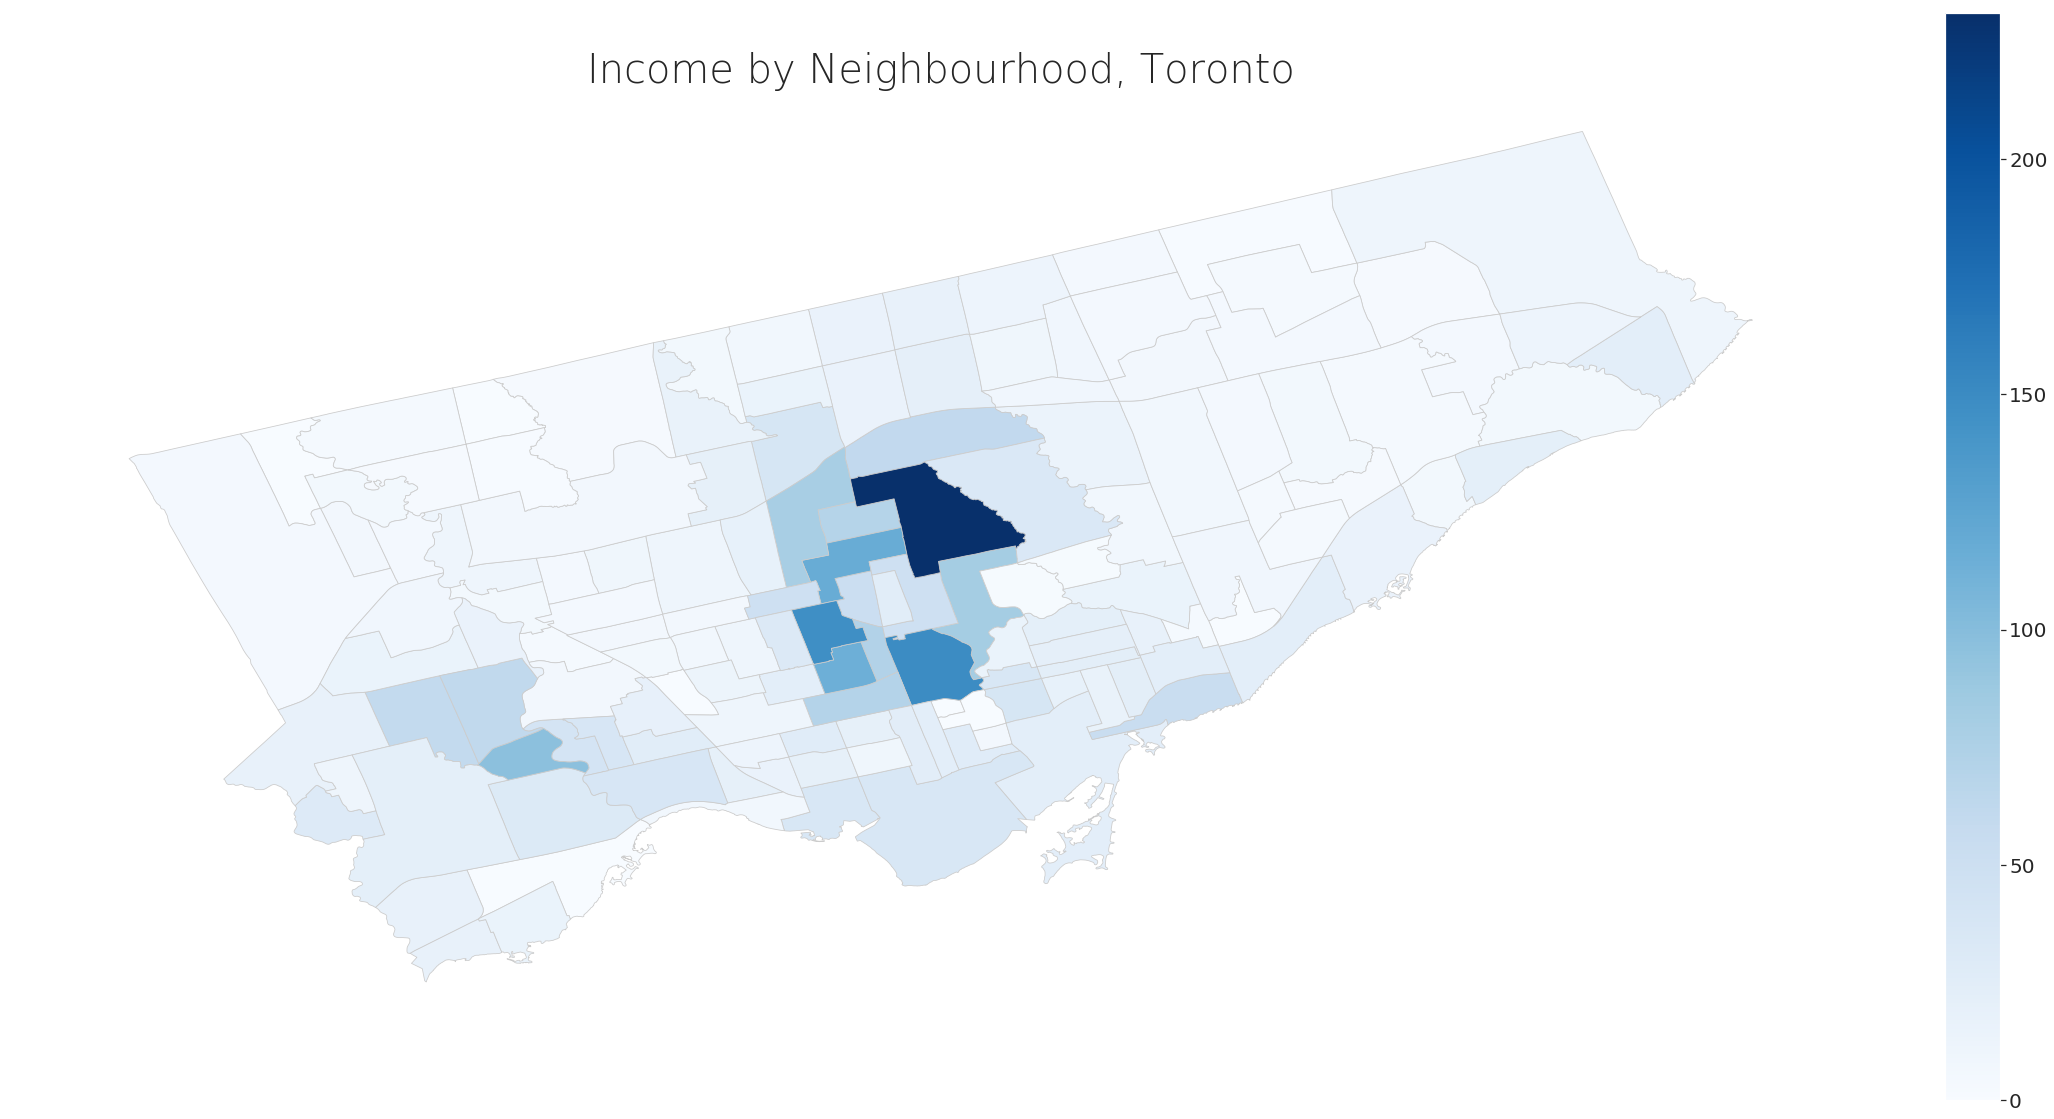

In [45]:
#plot a map
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Income by Neighbourhood, Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged_income.plot('HoodAveIncome', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [46]:
print('Correlation HoodIncome and MCI')
merged_income['Type'].corr(merged_income['HoodAveIncome']) 

Correlation HoodIncome and MCI


-0.1743236740116855

In [47]:
pg.corr(x=merged_income['Type'], y=merged_income['HoodAveIncome'])

NameError: name 'pg' is not defined

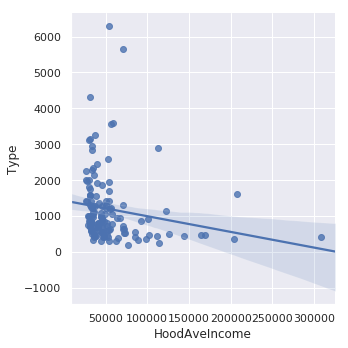

In [48]:
sns.lmplot(data=merged_income, x='HoodAveIncome', y='Type')

With neighborhood income going up the MCI is going down. The p-val =0.04 < 0.05 therefore, the confidence in correlation is high

## Crime to Income ratio

I will add crime to income ration. It will highlight neighborhoods for hi ratios for example , if number of crime is high but income is high, the ration will be also high. Also , if crime is low and income is low then ration will be also higher. 

In [49]:
merged_income['Ratio'] = 100 * merged_income['Type'] / merged_income['HoodAveIncome']
merged_income.head()

,neighbourhood,FIELD_7,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,...,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,Hood_ID,Type,HoodAveIncome,HoodID,Ratio
0,wychwood,Wychwood (94),2661,25886861,25926662,49885,94,94,Wychwood (94),None,...,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",94,622,54460.0,94.0,1.142123
1,yonge-eglinton,Yonge-Eglinton (100),2662,25886820,25926663,49885,100,100,Yonge-Eglinton (100),None,...,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",100,323,89330.0,100.0,0.361581
2,yonge-st.clair,Yonge-St.Clair (97),2663,25886834,25926664,49885,97,97,Yonge-St.Clair (97),None,...,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",97,234,114174.0,97.0,0.204950
3,york university heights,York University Heights (27),2664,25886593,25926665,49885,27,27,York University Heights (27),None,...,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",27,3122,29958.0,27.0,10.421256
4,yorkdale-glen park,Yorkdale-Glen Park (31),2665,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),None,...,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",31,1565,38527.0,31.0,4.062086


In [50]:
merged_income.sort_values("Ratio", axis = 0, ascending = False,
                 inplace = True)


In [51]:
merged_income[['FIELD_7','Type','HoodAveIncome','Ratio']].head(5)

,FIELD_7,Type,HoodAveIncome,Ratio
63,West Humber-Clairville (1),4322,31771.0,13.603601
97,Church-Yonge Corridor (75),6294,53583.0,11.746263
3,York University Heights (27),3122,29958.0,10.421256
71,Woburn (137),3149,30878.0,10.198199
136,Kensington-Chinatown (78),3259,37422.0,8.708781


In [52]:
merged_income[['FIELD_7','Type','HoodAveIncome','Ratio']].tail(11)

,FIELD_7,Type,HoodAveIncome,Ratio
138,Kingsway South (15),453,144642.0,0.313187
95,Casa Loma (96),456,165047.0,0.276285
8,Lawrence Park South (103),467,169203.0,0.276000
5,Lambton Baby Point (114),190,76629.0,0.247948
2,Yonge-St.Clair (97),234,114174.0,0.204950
118,Forest Hill South (101),358,204521.0,0.175043
90,Bridle Path-Sunnybrook-York Mills (41),418,308010.0,0.135710
16,Mimico (includes Humber Bay Shores) (17),2031,NaN,NaN
28,North St.James Town (74),1508,NaN,NaN
66,Weston-Pellam Park (91),699,NaN,NaN


/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


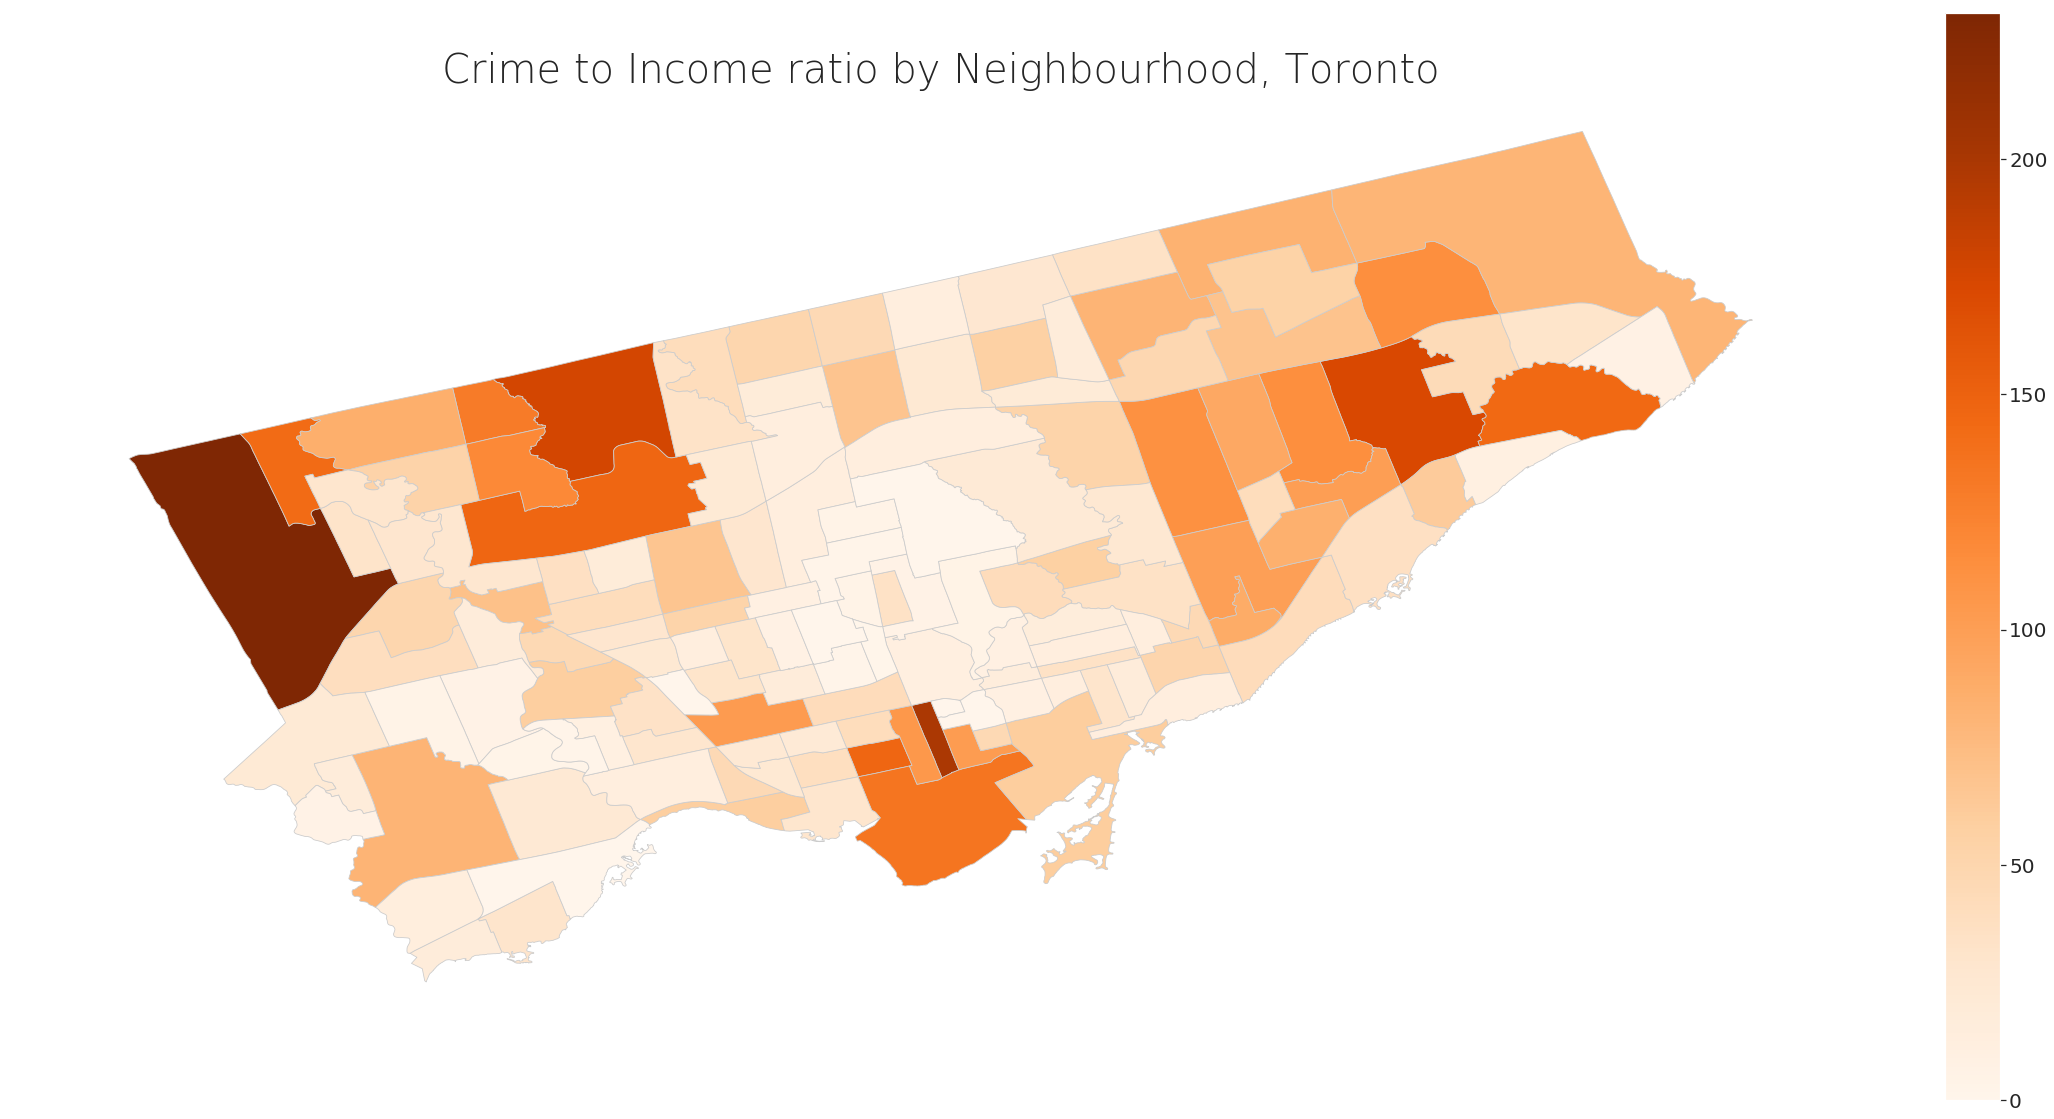

In [53]:
#plot a map
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Crime to Income ratio by Neighbourhood, Toronto', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged_income.plot('Ratio', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

This ratio did not change picture at all. It just shows that low income neighborhoods have the most crimes. 

However, it highlighted additional neighborhoods with high crime/income ratio
 - York University Heights (27)
 - Woburn (137)
 - Kensington-Chinatown (78)
 

In addition, <b>Church-Yonge Corridor (75)</b> stands out from the rest of neighborhoods. The income is about 1.7 times higher than all other high MCI hoods, however, the MCI is the highest amongst all Toronto neighborhoods 

# Population, Unemployment Rate, Average Income 

## Loading and cleaning

### Population data

In [54]:
#prepare population data
population = pd.read_csv('../input/pop_estimate.csv')
population

,Year,Population
0,2001,2481494
1,2002,2485851
2,2003,2490209
3,2004,2494566
4,2005,2498924
5,2006,2503281
6,2007,2525637
7,2008,2547993
8,2009,2570348
9,2010,2592704


<BarContainer object of 20 artists>

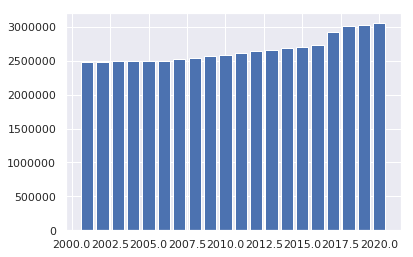

In [55]:
plt.bar('Year', height='Population', width=0.8, align='center', data=population)

In [56]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Year          20 non-null int64
Population    20 non-null int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [57]:
#remove years that are not used
#population = population[13:]
#population = population[:-2]
population = population[(population['Year'] >=2014) & (population['Year'] <=2018)]
population = population.reset_index(drop=True)
population

,Year,Population
0,2014,2684967
1,2015,2708269
2,2016,2731571
3,2017,2930000
4,2018,3006000


In [58]:
#add population to annual homicide dataset
df_annual_percap = df_annual
df_annual_percap = df_annual_percap.join(population.Population)

In [59]:
df_annual_percap

,Year,Type,Population
0,2014,31686,2684967
1,2015,32341,2708269
2,2016,32826,2731571
3,2017,34522,2930000
4,2018,35478,3006000


Since per capita value is small, it would be useful to scale population down by a factor of 100. This additional value will be a better visual when plotted. 

In [60]:
#number of homicide per 1,000 and  in percent
df_annual_percap['PerCap%'] = round(100*df_annual_percap.Type/df_annual_percap.Population,4)
#df_annual_percap['PerCap1K%'] = round(100*df_annual_percap.Type/df_annual_percap.Population,2)
df_annual_percap['Pop100'] = round(df_annual_percap.Population/100,2)
df_annual_percap

,Year,Type,Population,PerCap%,Pop100
0,2014,31686,2684967,1.1801,26849.67
1,2015,32341,2708269,1.1942,27082.69
2,2016,32826,2731571,1.2017,27315.71
3,2017,34522,2930000,1.1782,29300.00
4,2018,35478,3006000,1.1802,30060.00


## Unemployment rate

In [61]:
#prepare unemployment rate
unemployment = pd.read_csv('../input/unemployment_ontario.csv')
unemployment

,Year,UnempRate
0,2004,6.8
1,2005,6.6
2,2006,6.3
3,2007,6.4
4,2008,6.6
5,2009,9.1
6,2010,8.7
7,2011,7.9
8,2012,7.9
9,2013,7.6


In [62]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Year         15 non-null int64
UnempRate    15 non-null float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


<BarContainer object of 15 artists>

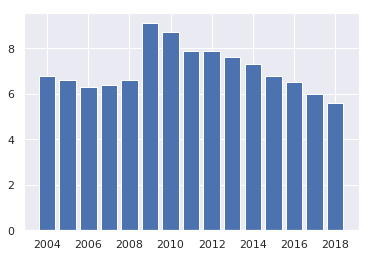

In [63]:
plt.bar('Year', height='UnempRate', width=0.8, align='center', data=unemployment)

In [64]:
#remove unused years 
unemployment = unemployment[(unemployment['Year'] >=2014) & (unemployment['Year']<=2018)]
unemployment = unemployment.reset_index(drop=True)
unemployment

,Year,UnempRate
0,2014,7.3
1,2015,6.8
2,2016,6.5
3,2017,6.0
4,2018,5.6


In [65]:
df_annual_percap = df_annual_percap.join(unemployment.UnempRate)
df_annual_percap

,Year,Type,Population,PerCap%,Pop100,UnempRate
0,2014,31686,2684967,1.1801,26849.67,7.3
1,2015,32341,2708269,1.1942,27082.69,6.8
2,2016,32826,2731571,1.2017,27315.71,6.5
3,2017,34522,2930000,1.1782,29300.00,6.0
4,2018,35478,3006000,1.1802,30060.00,5.6


# Average Income

In [66]:
#Load and prepare average income data
aveIncome = pd.read_csv('../input/average_income.csv')
aveIncome

,Year,AverageIncome
0,2004,60000
1,2005,60200
2,2006,82300
3,2007,82300
4,2008,85600
5,2009,83300
6,2010,88100
7,2011,97900
8,2012,88100
9,2013,91400


<BarContainer object of 15 artists>

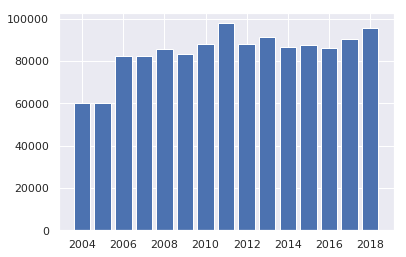

In [67]:
plt.bar('Year', height='AverageIncome', width=0.8, align='center', data=aveIncome)

In [68]:
#remove unused years 
aveIncome = aveIncome[(aveIncome['Year'] >=2014) & (aveIncome['Year']<=2018)]
aveIncome = aveIncome.reset_index(drop=True)
aveIncome

,Year,AverageIncome
0,2014,86700
1,2015,87700
2,2016,86400
3,2017,90600
4,2018,95600


In [69]:
df_annual_percap = df_annual_percap.join(aveIncome.AverageIncome)
df_annual_percap

,Year,Type,Population,PerCap%,Pop100,UnempRate,AverageIncome
0,2014,31686,2684967,1.1801,26849.67,7.3,86700
1,2015,32341,2708269,1.1942,27082.69,6.8,87700
2,2016,32826,2731571,1.2017,27315.71,6.5,86400
3,2017,34522,2930000,1.1782,29300.00,6.0,90600
4,2018,35478,3006000,1.1802,30060.00,5.6,95600


# Correlation MCI & MCI per capita with Population, Unemployment Rate, Average Income

## Correlation MCI with Population

In [70]:
print('Correlation MCI per Capita and Population')
df_annual_percap['Population'].corr(df_annual_percap['Type']) 

Correlation MCI per Capita and Population


0.9886166697933653

In [71]:
pg.corr(x=df_annual_percap['Population'], y=df_annual_percap['Type'])

NameError: name 'pg' is not defined

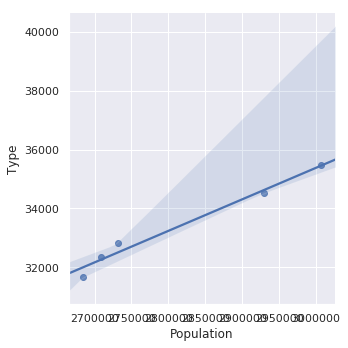

In [72]:
sns.lmplot(data=df_annual_percap, x='Population', y='Type')

Correlation of MCI with Population is 0.99, with p-val =0.001 <0.05 , this very strong confidence in correlation. 
It is expected result, when population goes up, the crime goes up as well.


## Correlation MCI with Unemployment

In [73]:
print('Correlation MCI per Capita and Unemployment')
df_annual_percap['UnempRate'].corr(df_annual_percap['PerCap%']) 


Correlation MCI per Capita and Unemployment


0.25537983228472094

In [74]:
pg.corr(x=df_annual_percap['UnempRate'], y=df_annual_percap['PerCap%'])

NameError: name 'pg' is not defined

In [75]:
print('Correlation MCI and Unemployment')
df_annual_percap['UnempRate'].corr(df_annual_percap['Type']) 

Correlation MCI and Unemployment


-0.9827531333312208

In [76]:
pg.corr(x=df_annual_percap['UnempRate'], y=df_annual_percap['Type'])

NameError: name 'pg' is not defined

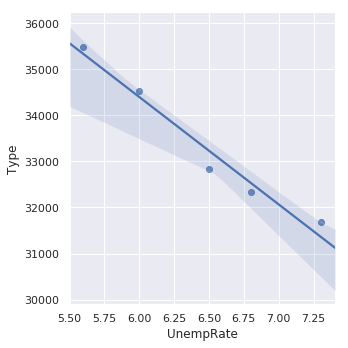

In [77]:
sns.lmplot(data=df_annual_percap, x='UnempRate', y='Type')

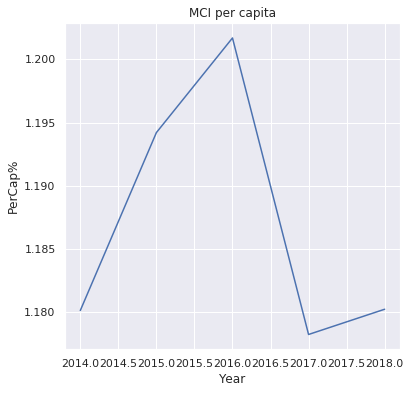

In [78]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x='Year', y='PerCap%', data=df_annual_percap, color='b')
ax.set_title('MCI per capita')
plt.show()

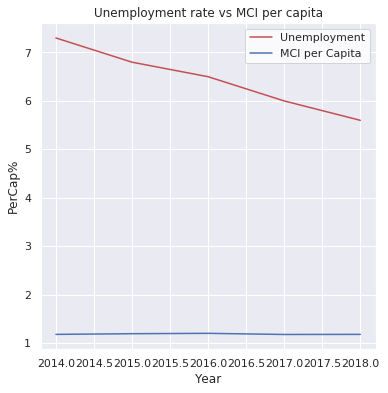

In [79]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x='Year', y='UnempRate', data=df_annual_percap, color='r')
sns.lineplot(x='Year', y='PerCap%', data=df_annual_percap, color='b')
ax.legend(['Unemployment', 'MCI per Capita'], facecolor='w')
ax.set_title('Unemployment rate vs MCI per capita')
plt.show()

Correlation of MCI with Unemployment rate is -0.98 and p-val = 0.03 so the confidence in correlation is high. This is unexpected result. One would expect that if unemployment goes down, then crime will go down as well. 


Looking at the graph per capita MCI jumped up in 2016 then lowered in 2017. However, plotting MCI per capita against Unemployment rate, MCI per capita looks flat when scaled. That is because the “jump” is only 0.02%. 

Let’s look at average income and gain some insights there. 


## Correlation MCI with Income

In [80]:
print('Correlation MCI per Capita and Average Income')
df_annual_percap['AverageIncome'].corr(df_annual_percap['PerCap%']) 


Correlation MCI per Capita and Average Income


-0.5615136975934895

In [81]:
pg.corr(x=df_annual_percap['AverageIncome'], y=df_annual_percap['PerCap%'])

NameError: name 'pg' is not defined

In [82]:
print('Correlation MCI and Average Income')
df_annual_percap['AverageIncome'].corr(df_annual_percap['Type']) 

Correlation MCI and Average Income


0.922688545267317

In [83]:
pg.corr(x=df_annual_percap['AverageIncome'], y=df_annual_percap['Type'])

NameError: name 'pg' is not defined

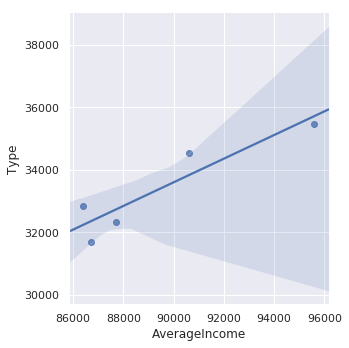

In [84]:
sns.lmplot(data=df_annual_percap, x='AverageIncome', y='Type')

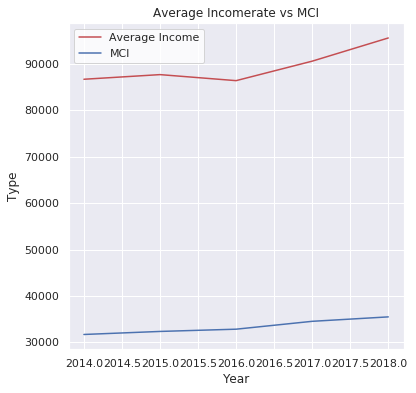

In [85]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x='Year', y='AverageIncome', data=df_annual_percap, color='r')
sns.lineplot(x='Year', y='Type', data=df_annual_percap, color='b')
ax.legend(['Average Income', 'MCI'], facecolor='w')
ax.set_title('Average Incomerate vs MCI')
plt.show()

Correlation of MCI per capita with Average income is -0.56 and p-val = 0.3 >0.05. Negative correlation is expected but the confidence in correlation is low. 

Now looking at correlation of MCI with Average income we find correlation is equal to 0.92 with p-val = 0.03 <0.05 this confidence is high. 

This again is unexpected result. It looks like when unemployment goes down and average income goes up so crime in the city goes. 

Its interesting to note, that crime per capita fluctuated a bit but the change is very small, it is staying constant, and low at about 1.8%, therefore per capita stats hitting at expected correlation, but the confidence in those correlations is low. 

Ardavan Eizadirad suggested in the research of crime in Toronto area that one of the roots of crime is poverty. 

I  think that the correlation is accurately calculated, but not does not represent the complete picture. Perhaps, if I look into age group, income and unemployment rate of people committing crime, then it could lead to similar conclusions. However, right now data does not support expected  prediction. 



# Linear regression MCI

In [57]:
#Linear regression function
def LinearPredict(x,y,years):
    #reshape data
    x = x.reshape((-1, 1))
    y = y.reshape((-1, 1))
    #build model and train
    model = LinearRegression()
    model.fit(x, y)
    #evaluate error
    r_sq = model.score(x, y)
    #make predictions
    y_pred = model.predict(years)
    
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    print('coefficient of determination:', r_sq)
    print('Prediction of homicides in', years, 'will be', np.round(y_pred,0))    
    
    return model.coef_, model.intercept_, y_pred


In [58]:
#Years to predict
yearsToPredict = np.array([[2019],[2020],[2021],[2022]])

In [59]:
#get MCI data
x = df_annual['Year'].values
y = df_annual['Type'].values
m,b, pred = LinearPredict(x,y,yearsToPredict)
#print("data", m,b,pred)

intercept: [-1935253.4]
slope: [[976.5]]
coefficient of determination: 0.9572473011622704
Prediction of homicides in [[2019]
 [2020]
 [2021]
 [2022]] will be [[36300.]
 [37277.]
 [38253.]
 [39230.]]


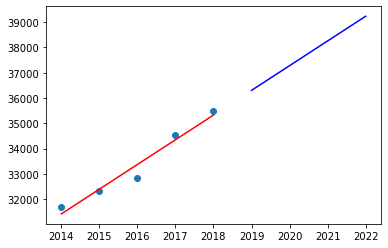

In [60]:
#Plot Results
plt.scatter(df_annual['Year'], df_annual['Type'], marker='o')
y =  m[0]*df_annual['Year']+b
x = df_annual['Year']

plt.plot(x, y, '-r')
plt.plot(yearsToPredict,pred,'-b')    

From the plot above it is clear that the linear regression fits very well. 

However, I will still try polynomial regression of 2nd and 3rd order. 

# Polynomial Regression MCI

## Polynomial regression of 2nd order

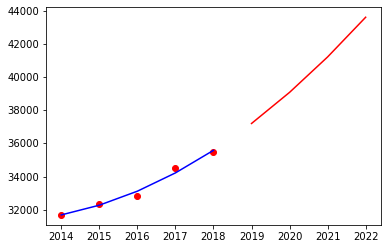

Polynomical Predict for  [[2019]
 [2020]
 [2021]
 [2022]] [37207. 39090. 41232. 43633.]


In [61]:
# Reshape Data
x = (df_annual['Year'].values).reshape(-1, 1)
y = df_annual['Type'].values

#build and train model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

#make prediction
pred = pol_reg.predict(poly_reg.fit_transform(yearsToPredict))

# Visualizing the Polymonial Regression results

plt.scatter(x, y, color='red')
plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')  
plt.plot(yearsToPredict,pred,'-r')
plt.show()

print('Polynomical Predict for ', yearsToPredict , np.round(pred,0))


From the plot above it is clear 2nd degree polynomial regression fits even better than linear. It seems to me a little bit more aggressive than linear, and seems over-fit. I lean towards using linear regression. 

## Polynomial regression of 3nd order

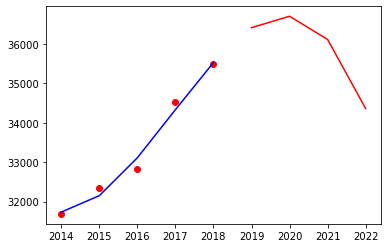

Polynomical Predict for  [[2019]
 [2020]
 [2021]
 [2022]] [36412.42346191 36702.63781738 36113.31872559 34359.7845459 ]


In [62]:
#build model
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
#train
pol_reg.fit(x_poly, y)
#predict 
pred = pol_reg.predict(poly_reg.fit_transform(yearsToPredict))
# Visualizing the Polymonial Regression results
plt.scatter(x, y, color='red')
plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')  
plt.plot(yearsToPredict,pred,'-r')
plt.show()

print('Polynomical Predict for ', yearsToPredict , pred)

It seems that 3rd order polynomial regression also over fitted. It softens predictions for 2019 and 2020. 

I think, my chose of model in this case, is linear regression. 

## Support Vector Machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.


In [63]:
from sklearn import svm

In [64]:
x = (df_annual['Year'].values).reshape((-1, 1))
y = (df_annual['Type'].values)
yearsToPredict

array([[2019],
       [2020],
       [2021],
       [2022]])

In [65]:
clf = svm.SVR(gamma='auto')
clf.fit(x,y)


resSVR = clf.predict(yearsToPredict)

resSvc_df =pd.DataFrame({'Predict': resSVR[:]})
resSvc_df

,Predict
0,32826.386195
1,32826.018439
2,32826.000124
3,32826.000000


The results for various models are:

    Linear regression - [2019 : 36300], [2020 : 37277]
    2nd order polynomial -  [2019 : 37207], [2020 : 39090]
    3rd order polynomial - [2019 : 36411], [2020 : 36702]
    Support vector machine -[2019 : 32826], [2020 : 32826]


It doesn’t seem that crime will be going down. I think that 2nd order polynomial fits data better than linear, therefore my chose is 2nd order polynomial regression. 

# Regression models per type of crime

Lets build regression models and make prediction for each crime group. 

In [66]:
#print dataset again
df_ct = df_ct.iloc[:, :-1]
df_ct

Occurrence_year,2014,2015,2016,2017,2018
Type,,,,,
Assault,16375,17705,18475,18973,18617
Auto Theft,3496,3195,3264,3558,4617
Break and Enter,7178,6899,6387,6876,7485
Other,15,15,25,15,25
Robbery,3585,3464,3613,3901,3522
Shooting,27,26,41,39,51
Stabbing,16,18,9,11,20
Theft Over,994,1019,1012,1149,1141


## Linear Regression

In [67]:
def LinearRegGroup(x,y,name):
    yearsToPredict = np.array([[2019],[2020]])
    
    x=x.reshape((-1,1))
    y=y.reshape((-1,1))
    
    model = LinearRegression()
    model.fit(x, y)
    #evaluate error
    r_sq = model.score(x, y)
    #make predictions
    y_pred = model.predict(yearsToPredict)
    
    print('*********************')
    print(name)
    print('*********************')
    
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)
    print('coefficient of determination:', r_sq)
    print('Prediction of',name,'in', yearsToPredict, 'will be', np.round(y_pred,0))    
    
    m = model.coef_
    b =  model.intercept_
             
    plt.scatter(x, y, marker='o')
    y1 =  m[0]*x+b
    x1 = x

    plt.plot(x1, y1, '-r')
    plt.plot(yearsToPredict,y_pred,'-b') 
    plt.show()

*********************
Assault
*********************
intercept: [-1141574.2]
slope: [[575.2]]
coefficient of determination: 0.7736606299374902
Prediction of Assault in [[2019]
 [2020]] will be [[19755.]
 [20330.]]


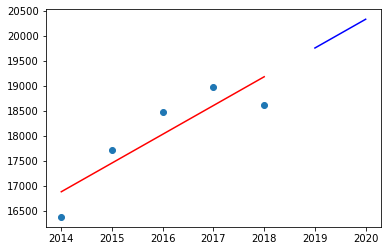

*********************
Auto Theft
*********************
intercept: [-521542.]
slope: [[260.5]]
coefficient of determination: 0.5139331722722488
Prediction of Auto Theft in [[2019]
 [2020]] will be [[4408.]
 [4668.]]


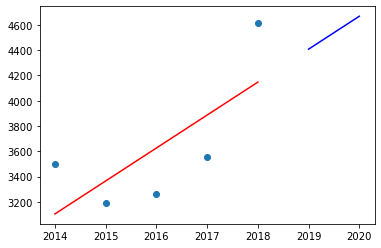

*********************
Break and Enter
*********************
intercept: [-112180.6]
slope: [[59.1]]
coefficient of determination: 0.05275112138100113
Prediction of Break and Enter in [[2019]
 [2020]] will be [[7142.]
 [7201.]]


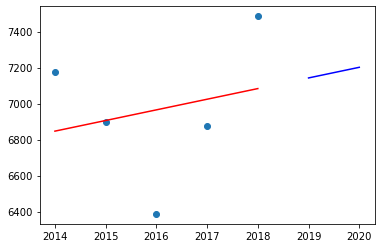

*********************
Other
*********************
intercept: [-4013.]
slope: [[2.]]
coefficient of determination: 0.33333333333333337
Prediction of Other in [[2019]
 [2020]] will be [[25.]
 [27.]]


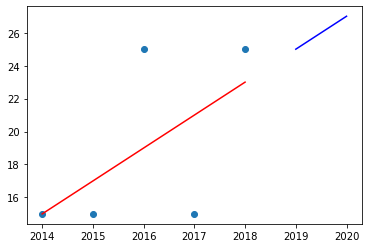

*********************
Robbery
*********************
intercept: [-59080.6]
slope: [[31.1]]
coefficient of determination: 0.08474634189083785
Prediction of Robbery in [[2019]
 [2020]] will be [[3710.]
 [3741.]]


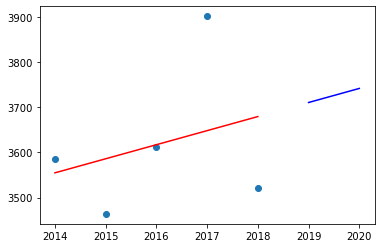

*********************
Shooting
*********************
intercept: [-12260.8]
slope: [[6.1]]
coefficient of determination: 0.8518772893772701
Prediction of Shooting in [[2019]
 [2020]] will be [[55.]
 [61.]]


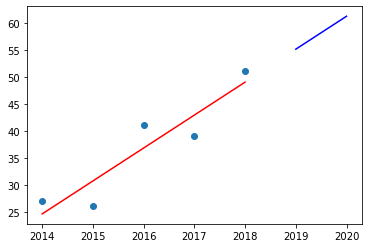

*********************
Stabbing
*********************
intercept: [-186.8]
slope: [[0.1]]
coefficient of determination: 0.001152073732717973
Prediction of Stabbing in [[2019]
 [2020]] will be [[15.]
 [15.]]


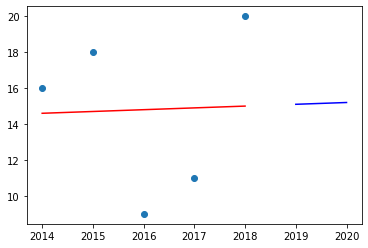

*********************
Theft Over
*********************
intercept: [-84415.4]
slope: [[42.4]]
coefficient of determination: 0.789252787777707
Prediction of Theft Over in [[2019]
 [2020]] will be [[1190.]
 [1233.]]


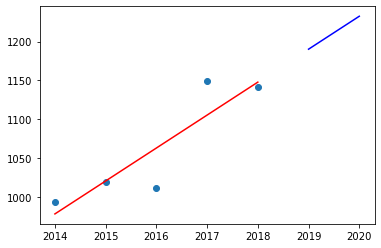

In [68]:
#cycle through each row and make prediction
for i in range(len(df_ct)):
    name = df_ct.iloc[i:i+1].index[0]
    y = df_ct.iloc[i:i+1].values
    x =df_ct.columns.values
    LinearRegGroup(x,y,name)

## 2nd order polynomial regression

In [88]:
def PolynomialRegressionGroup(x,y,name, d):
    yearsToPredict = np.array([[2019],[2020]])
        
    x=x.reshape((-1,1))
    y=y.reshape((-1,1))
    
    poly_reg = PolynomialFeatures(degree=d)
    x_poly = poly_reg.fit_transform(x)
    pol_reg = LinearRegression()
    pol_reg.fit(x_poly, y)

    pred = pol_reg.predict(poly_reg.fit_transform(yearsToPredict))
        
    print('*********************')
    print(name)
    print('*********************')
        
    # Visualizing the Polymonial Regression results

    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')  
    plt.plot(yearsToPredict,pred,'-r')
    plt.show()

    print('Polynomical Predict for ', yearsToPredict , np.round(pred,0))

*********************
Assault
*********************


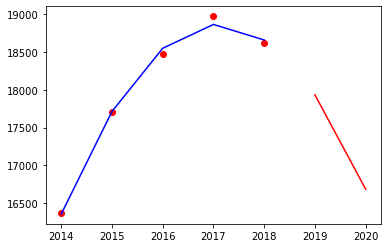

Polynomical Predict for  [[2019]
 [2020]] [[17933.]
 [16686.]]
*********************
Auto Theft
*********************


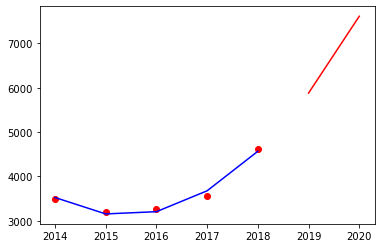

Polynomical Predict for  [[2019]
 [2020]] [[5880.]
 [7613.]]
*********************
Break and Enter
*********************


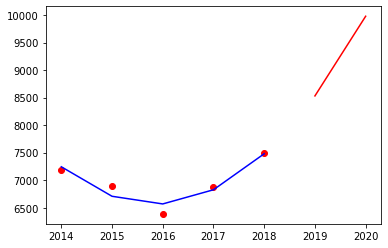

Polynomical Predict for  [[2019]
 [2020]] [[8531.]
 [9978.]]
*********************
Other
*********************


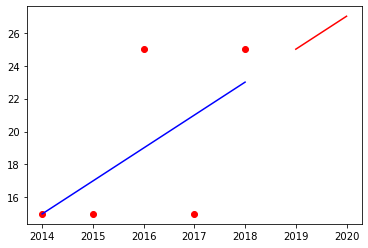

Polynomical Predict for  [[2019]
 [2020]] [[25.]
 [27.]]
*********************
Robbery
*********************


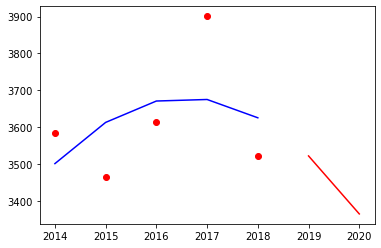

Polynomical Predict for  [[2019]
 [2020]] [[3522.]
 [3364.]]
*********************
Shooting
*********************


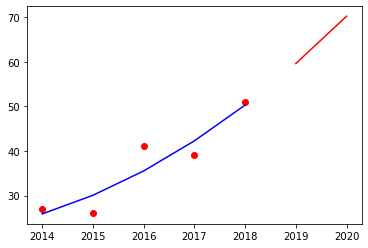

Polynomical Predict for  [[2019]
 [2020]] [[60.]
 [70.]]
*********************
Stabbing
*********************


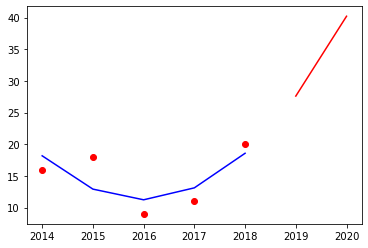

Polynomical Predict for  [[2019]
 [2020]] [[28.]
 [40.]]
*********************
Theft Over
*********************


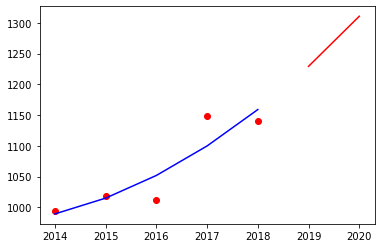

Polynomical Predict for  [[2019]
 [2020]] [[1229.]
 [1311.]]


In [89]:
for i in range(len(df_ct)):
    name = df_ct.iloc[i:i+1].index[0]
    y = df_ct.iloc[i:i+1].values
    x =df_ct.columns.values
    PolynomialRegressionGroup(x,y,name,2)

## 3rd order polynomial regression

*********************
Assault
*********************


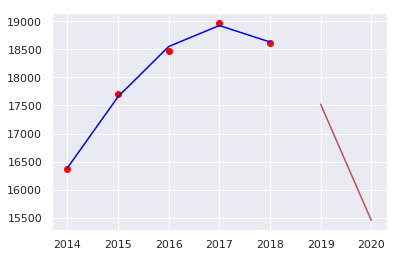

Polynomical Predict for  [[2019]
 [2020]] [[17522.]
 [15453.]]
*********************
Auto Theft
*********************


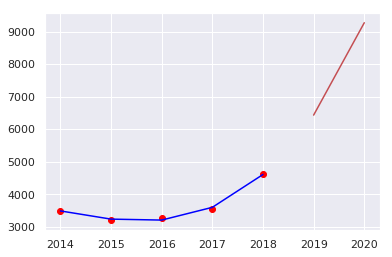

Polynomical Predict for  [[2019]
 [2020]] [[6431.]
 [9270.]]
*********************
Break and Enter
*********************


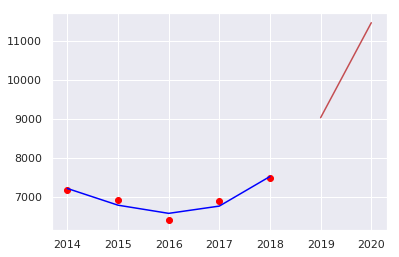

Polynomical Predict for  [[2019]
 [2020]] [[ 9027.]
 [11466.]]
*********************
Other
*********************


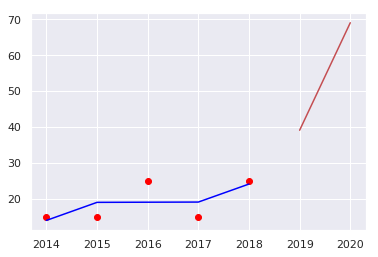

Polynomical Predict for  [[2019]
 [2020]] [[39.]
 [69.]]
*********************
Robbery
*********************


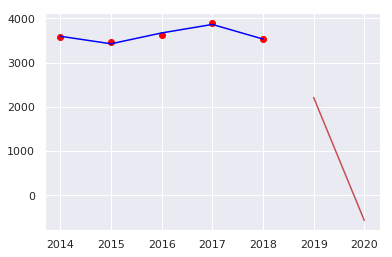

Polynomical Predict for  [[2019]
 [2020]] [[2211.]
 [-571.]]
*********************
Shooting
*********************


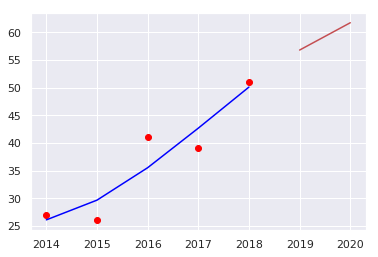

Polynomical Predict for  [[2019]
 [2020]] [[57.]
 [62.]]
*********************
Stabbing
*********************


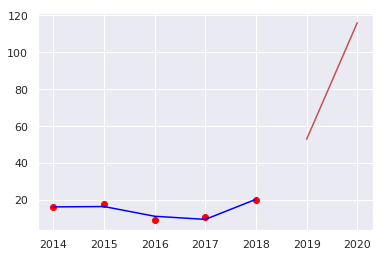

Polynomical Predict for  [[2019]
 [2020]] [[ 53.]
 [116.]]
*********************
Theft Over
*********************


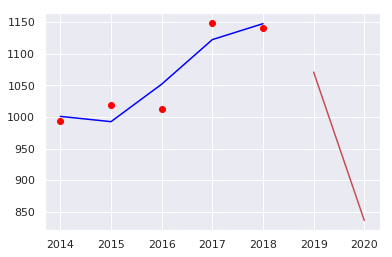

Polynomical Predict for  [[2019]
 [2020]] [[1071.]
 [ 836.]]


In [100]:
for i in range(len(df_ct)):
    name = df_ct.iloc[i:i+1].index[0]
    y = df_ct.iloc[i:i+1].values
    x =df_ct.columns.values
    PolynomialRegressionGroup(x,y,name,3)

Looking at regression models it seems to me that the best model to choose is linear regression. The reason for the chose is that it seems to me that 2nd and 3rd order regressions are overfitting and overly optimistic or pessimistic. 

# Seasonality Analysis

In [97]:
#Set Occurance date as index
df_ts = df.set_index('Occurrence_Date')
df_ts

,Occurrence_year,Occurrence_Month,Division,Hood_ID,Type,Neighbourhood,Lat,Long
Occurrence_Date,,,,,,,,
2014-01-14 05:00:00,2014,January,D41,126,Other,Dorset Park (126),43.759132,-79.289589
2014-01-29 05:00:00,2014,January,D23,8,Shooting,Humber Heights-Westmount (8),43.694614,-79.517342
2014-01-29 05:00:00,2014,January,D43,137,Other,Woburn (137),43.770390,-79.220123
2014-02-02 05:00:00,2014,February,D54,54,Stabbing,O'Connor-Parkview (54),43.702221,-79.297287
2014-02-03 05:00:00,2014,February,D41,119,Other,Wexford/Maryvale (119),43.769482,-79.302269
...,...,...,...,...,...,...,...,...
2018-05-16 20:30:00,2018,May,D54,43,Auto Theft,Victoria Village (43),43.718910,-79.304466
2018-05-24 18:00:00,2018,May,D55,62,Auto Theft,East End-Danforth (62),43.684856,-79.297562
2018-05-24 19:00:00,2018,May,D41,122,Auto Theft,Birchcliffe-Cliffside (122),43.685402,-79.274391


In [98]:
df_ts['Occurrence_year']
df_ts[['Occurrence_year']]


,Occurrence_year
Occurrence_Date,
2014-01-14 05:00:00,2014
2014-01-29 05:00:00,2014
2014-01-29 05:00:00,2014
2014-02-02 05:00:00,2014
2014-02-03 05:00:00,2014
...,...
2018-05-16 20:30:00,2018
2018-05-24 18:00:00,2018
2018-05-24 19:00:00,2018


## Autocorrelation

In [99]:
#Resample monthly and weekly
#We need to drop NA because during resampling N/A might be added 
df_ts_monthly = df_ts.Occurrence_year.resample('M').count()
df__ts_monthly = df_ts_monthly.dropna()
df_ts_weekly = df_ts.Occurrence_year.resample('W').count()
df_ts_weekly = df_ts_weekly.dropna()

In [100]:
#Autocorrelation formatted plot
def AutocorrelationFormatedPlot(stock, symbol):
    TimePlot = pd.plotting.autocorrelation_plot(stock, color='r')
    title = symbol + " Autocorrelation Graph"
    TimePlot.set_title(title)
    TimePlot.set_ylabel("Correlation")
    TimePlot.set_xlabel("Lag Month")
    None

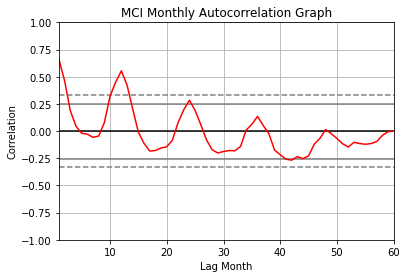

In [101]:
AutocorrelationFormatedPlot(df_ts_monthly,"MCI Monthly")

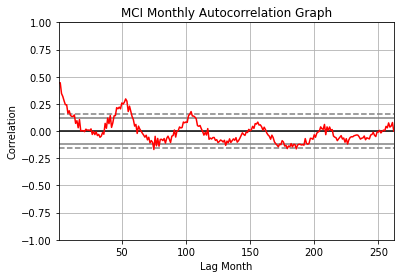

In [102]:
AutocorrelationFormatedPlot(df_ts_weekly,"MCI Monthly")

Monthly autocorrelation shows that there is correlation in the first 5 months , and 12 months


Weekly trend has correlation in first 15 weeks and follows by correlation at 50 weeks.

## Montly and weekly plots

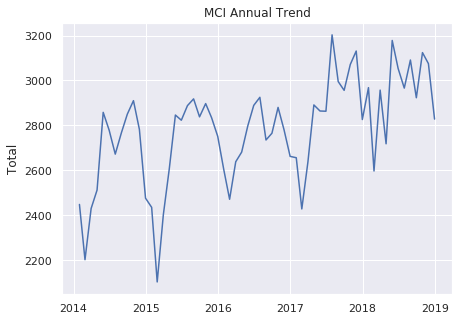

In [107]:
plt.figure(figsize=(7,5))
plt.ylabel('Total')
plt.title('MCI Annual Trend')
plt.plot(df_ts_monthly)

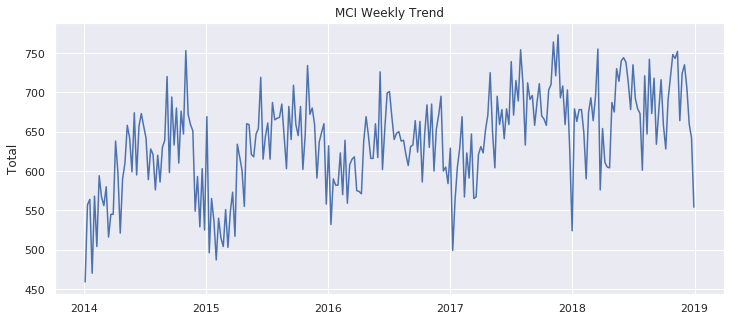

In [108]:
#during re-sampling last few days are shifted to 2019, therefore, we remove last point from the plot [:-1]
plt.figure(figsize=(12,5))
plt.ylabel('Total')
plt.title('MCI Weekly Trend')
#plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
plt.plot(df_ts_weekly[:-1])

The number of crimes increases in the middle of the year and goes down in January. 

To get a different perspective, I will calculated total of crime in each month.

In [109]:
monthlyTotal = df_ts_monthly.loc['2014'].values
for val in range (2015,2019):
    monthlyTotal = monthlyTotal + df_ts_monthly.loc[str(val)].values

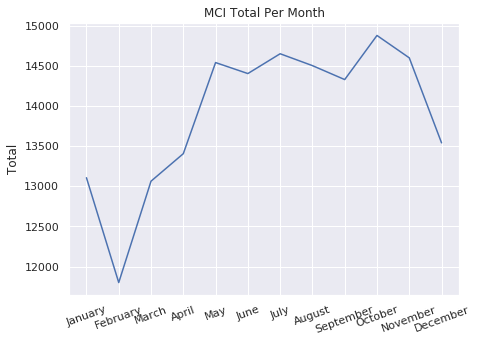

In [110]:
plt.figure(figsize=(7,5))
plt.ylabel('Total')
plt.title('MCI Total Per Month')
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
plt.plot(monthlyTotal)

In [111]:
print('Monthly Median')
df_ts_monthly.median()

Monthly Median


2827.0

In [12]:
import geopandas as gpd

In [14]:
location = 'G:/Datadocmn/kenyadata/counties.shp'
hoods = gpd.read_file(location)
hoods.sample(5)

,CountyCode,CountyName,eventCount,geometry
20,21,Murang'a,15,"POLYGON ((36.74222 -0.56985, 36.74302 -0.56992..."
30,31,Laikipia,56,"POLYGON ((36.83075 0.81878, 36.83212 0.81611, ..."
44,45,Kisii,60,"POLYGON ((34.86591 -0.50500, 34.86610 -0.50515..."
46,47,Nairobi,401,"POLYGON ((36.90434 -1.16066, 36.90624 -1.16160..."
19,20,Kirinyaga,27,"POLYGON ((37.42661 -0.42986, 37.42664 -0.42999..."


<AxesSubplot:>

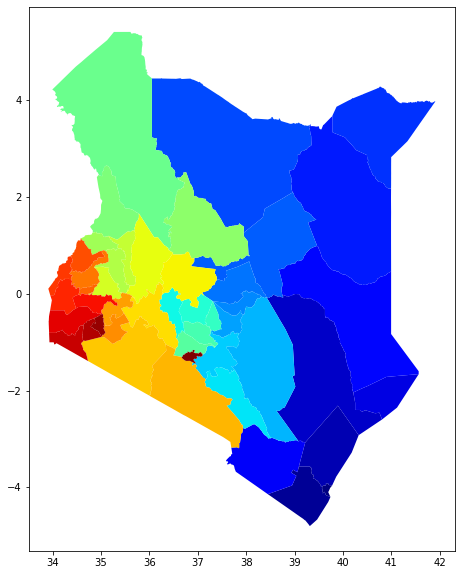

In [19]:
hoods.plot(cmap='jet',figsize=(10,10))

It is not possible to determine the reason for seasonality from the data itself. Maybe Christmas spirit has something do to with it :)  

### Median of each month 

In [112]:
df_ts_monthly_ct = pd.crosstab(df_ts.Occurrence_Month, df_ts.Occurrence_year)
df_ts_monthly_ct['Median'] = df_ts_monthly_ct.median(axis=1)
df_ts_monthly_ct.sort_values('Median',axis = 0, ascending = False,
                 inplace = True)
df_ts_monthly_ct

Occurrence_year,2014,2015,2016,2017,2018,Median
Occurrence_Month,,,,,,
July,2672,2888,2925,3203,2966,2925.0
August,2767,2918,2735,2995,3091,2918.0
October,2910,2897,2880,3071,3124,2910.0
June,2779,2823,2889,2863,3053,2863.0
May,2858,2846,2798,2864,3178,2858.0
September,2850,2838,2765,2956,2923,2850.0
November,2782,2834,2781,3131,3075,2834.0
December,2476,2751,2662,2826,2828,2751.0
April,2512,2606,2681,2891,2718,2681.0


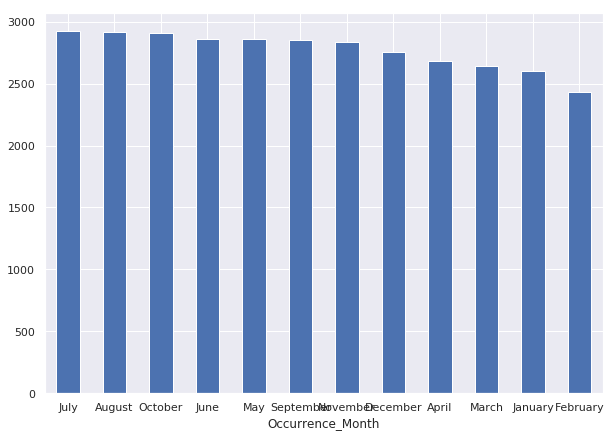

In [113]:
df_ts_monthly_ct['Median'].plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7));

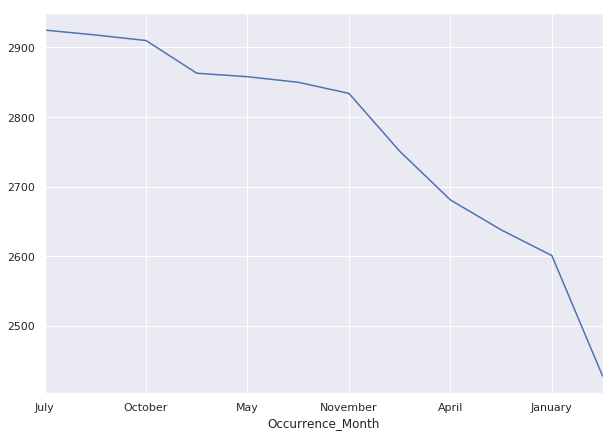

In [114]:
df_ts_monthly_ct['Median'].plot(stacked=False, rot = 0, figsize=(10, 7));

Taking a closer look at crimes per month we find that: 
- July, August, October have highest median number of crimes
- March, January, February have lowest median number of crimes


# MCI Prediction model

I will build a model that will predict type of MCI based on location of crime. 

The following alogrithms will be tested
- KNeighborsClassifier
- DecisionTreeClassifier

In [16]:
x = df[['Lat', 'Long']].values
print(type(x))
x

<class 'numpy.ndarray'>


array([[ 43.6850281, -79.3928528],
       [ 43.7815361, -79.2349625],
       [ 43.8108597, -79.2068939],
       ...,
       [ 43.6854019, -79.2743912],
       [ 43.6867599, -79.5955658],
       [ 43.7753639, -79.4811783]])

In [17]:
y = df[['Type']].values.flatten()
print(type(y))
y

<class 'numpy.ndarray'>


array(['Other', 'Shooting', 'Shooting', ..., 'Auto Theft', 'Auto Theft',
       'Auto Theft'], dtype=object)

In [18]:
#Split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [19]:
#Evaluation function
def Evaluate(predicted, y_test):
    true_pred = np.sum(predicted == y_test)
    total_pred = predicted.shape[0]
    print('True predictions', true_pred, 'out of', total_pred)
    print('Percent of correct predictions', round(100*true_pred/total_pred,2), '%')
    

# KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#Define Model
knc = KNeighborsClassifier(n_neighbors =15) # 	n_neighbors : int, optional (default = 5)
#Train
knc = knc.fit(x_train, y_train)
#Predict
resKN = knc.predict(x_test)
#Evaluate
Evaluate(resKN,y_test)
#convert resKN to dataframe 
resKN_df =pd.DataFrame({'knc': resKN[:]})

resKN_df.head(10)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


True predictions 19060 out of 33708
Percent of correct predictions 56.54 %


,knc
0,Robbery
1,Assault
2,Break and Enter
3,Assault
4,Break and Enter
5,Assault
6,Break and Enter
7,Assault
8,Auto Theft
9,Break and Enter


I have tested different values for n_neighbors, if n_neighbors =5 the error is higher than when n_neighbors =15. Further increase of n_neighbors does not produce better results.

## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier(max_depth=20)
dtc = dtc.fit(x_train,y_train)
resDtc = dtc.predict(x_test)
Evaluate(resDtc,y_test)
dtc_df =pd.DataFrame({'dtc': resDtc[:]})
dtc_df.head()

True predictions 19270 out of 33708
Percent of correct predictions 57.17 %


,dtc
0,Robbery
1,Assault
2,Break and Enter
3,Assault
4,Assault


I have tested different max_depth, found that increasing max_depth pass 20 does not produce better results. 

# LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(random_state=0)
lr = lr.fit(x_train, y_train)
resLr = lr.predict(x_test)
Evaluate(resLr,y_test)

lr_df =pd.DataFrame({'lr': resLr[:]})
lr_df.head()

True predictions 18238 out of 33708
Percent of correct predictions 54.11 %


,lr
0,Assault
1,Assault
2,Assault
3,Assault
4,Assault


# Voting for most frequent prediction

I have 3 predictions. To improve prediction results I will create voting algorithm.

If 2 out of 3 predictions are the same, I will choose that prediction, otherwise I will select 1st column by default
The logic is this 

If (a==b) or (a==c) then select a

Ifelse (b==c) then select b

Else select a by default

Above can be transformed to the following statement 

If (b==c) then select b

Else select a by default




In [26]:
df_predict = resKN_df.join(dtc_df)
df_predict = df_predict.join(lr_df)
#df_predict.head()

In [27]:
df_predict_votes = df_predict.copy()

In [28]:
df_predict_votes.head()

,knc,dtc,lr
0,Robbery,Robbery,Assault
1,Assault,Assault,Assault
2,Break and Enter,Break and Enter,Assault
3,Assault,Assault,Assault
4,Break and Enter,Assault,Assault


In [29]:
df_predict_votes['vote'] = 'none'
df_predict_votes.head()

,knc,dtc,lr,vote
0,Robbery,Robbery,Assault,none
1,Assault,Assault,Assault,none
2,Break and Enter,Break and Enter,Assault,none
3,Assault,Assault,Assault,none
4,Break and Enter,Assault,Assault,none


In [30]:
for items, vals in df_predict_votes.iterrows():    
    if(vals['dtc'] == vals['lr']):
        vals['vote'] = vals['dtc']
    else:
        vals['vote'] = vals['knc']
    
    #print(items, vals['knc'],vals['dtc'],vals['lr'], vals['vote'])

In [31]:
y_voted =df_predict_votes[['vote']].values.flatten()
print(type(y_voted))
y_voted

<class 'numpy.ndarray'>


array(['Robbery', 'Assault', 'Break and Enter', ..., 'Assault', 'Assault',
       'Assault'], dtype=object)

In [32]:
Evaluate(y_voted,y_test)

True predictions 19303 out of 33708
Percent of correct predictions 57.27 %


It looks like voting did not add much to the model. Personally I am not surprised to see low rate of prediction. The type of crime does not depend on location, and it is distributed by chance. 

<b>
The data were taken from various sources and may not be accurate. Also, I am sure of it , I made a few mistakes in my calculations. 

Please take a good look at the quality of data, and errors, before using this notebook. 
</b>